

# <font color='blue'>Análisis Completo de Machine Learning y Deep Learning usando un Dataset de Clasificador de Residuos de Kaglee
Elan Francisco Perea - Héctor Daniel Cardona Londoño</font> 

In [121]:
#Montar la unidad de Google Drive para acceder al Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importando Librerias archivo Cancer

In [3]:
import seaborn as sn; sn.set() 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import pdist, squareform
from scipy.stats import mode

from keras.layers import Dense
import matplotlib.pyplot as plt
from pandas import set_option
import pandas as pd
from keras.models import Sequential
import keras.utils
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
import numpy as np 
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn 
import keras
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.layers import Dense, Flatten, Conv1D

from keras.layers import Dropout
from keras.constraints import maxnorm

import cv2
import scipy
import os
%matplotlib inline
import matplotlib.pyplot as plt

# Importando Librerias notebook Example_KNN.ipynb

In [4]:

import numpy as np
from time import time
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import cv2
import scipy
import os
%matplotlib inline
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [118]:
import seaborn as sn; sn.set() 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import pdist, squareform
from scipy.stats import mode

from keras.layers import Dense
import matplotlib.pyplot as plt
from pandas import set_option
import pandas as pd
from keras.models import Sequential
import keras.utils
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
import numpy as np 
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn 
import keras
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv2D, GlobalAveragePooling2D, MaxPooling2D

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.layers import Dense, Flatten, Conv2D
from keras.layers import Dropout
from keras.constraints import maxnorm



In [5]:
#Libreias para establecer la fecha
from datetime import date
from datetime import datetime
from pytz import timezone
import pytz


def fecha_hora():
  utc = pytz.utc
  gmt5 = pytz.timezone('Etc/GMT+5')
  fecha_hora = datetime.now().astimezone(gmt5).isoformat(timespec='seconds')

  return fecha_hora

print(fecha_hora())

2021-04-15T20:38:47-05:00


# **Dataset**
El archivo contiene dos(2) carpetas Train y Test, las cuales tienen clasificados los residuos en:<p>
**O:** Orgánicos<p>
**R:** Reciclables

In [5]:
#Se realiza lectura del directorio DATASET descargado https://www.kaggle.com/techsash/waste-classification-data
BASE_DIR = '/content/drive/MyDrive/Especialización Ingenieria SW/Semestre I/12. IA/Proyecto IA/DATASET/'

#Almacenamienot de gráficas
BASE_DIR_GRA = '/content/drive/MyDrive/Especialización Ingenieria SW/Semestre I/12. IA/Proyecto IA/GraficosNotebook/'


In [6]:
#Libreias para establecer la fecha
from datetime import date
from datetime import datetime
from pytz import timezone
import pytz


def fecha_hora():
  utc = pytz.utc
  gmt5 = pytz.timezone('Etc/GMT+5')
  fecha_hora = datetime.now().astimezone(gmt5).isoformat(timespec='seconds')

  return fecha_hora

print(fecha_hora())

2021-04-15T23:00:26-05:00


## Almacenar las imágenes en un arreglo y guardar en un archivo NPY

In [ ]:
#Función para leer las imágenes
def get_data(folder, name):
    """
    Cargue de los datos y etiquetas de la carpeta DATASET.
    O: Residuos Ordinarios
    R: Residuos Reciclables

    """
    X = []
    y = []
    destination = BASE_DIR
   
    
    for tipo_residuo in os.listdir(folder):
        if not tipo_residuo.startswith('.'):
            if tipo_residuo in ['O']:
                label = '0'
            else:
                label = '1'
            
            #Se inica evaluando el modelo con un procentaje de imágenes
            #cant_images = int(len(os.listdir(folder + tipo_residuo))*0.3) 
            
            for image_filename in os.listdir(folder + tipo_residuo):
            #for image_filename in random.sample(os.listdir(folder + tipo_residuo),cant_images):
                img_file = cv2.imread(folder + tipo_residuo + '/' + image_filename)
                if img_file is not None:               
                    # Reajsutar la imagen a 120, 160, 3
                    #img_file = cv2.resize(arr=img_file, size=(120, 160, 3))
                    img_file = cv2.cvtColor(img_file, cv2.COLOR_BGR2RGB)
                    img_file = cv2.resize(img_file, (64, 64))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    
    #Guardar las imagenes en un arreglo numpy como un archivo .npy
    X_ruta_archivo = destination+'/X_'+name+'.npy'
    y_ruta_archivo = destination+'/y_'+name+'.npy'
    np.save(X_ruta_archivo, X)
    np.save(y_ruta_archivo, y)

    return X,y

In [ ]:
# ----------------------------------------- USARSE LA PRIMERA VEZ PARA LEER LAS IMAGENES --------------------------
#Leer las imágenes de las carpetas
t0 = time()
X_train, y_train = get_data(BASE_DIR + 'TRAIN/','train')
X_test, y_test = get_data(BASE_DIR + 'TEST/','test')


print("done in %0.3fs" % (time() - t0))

#**Preprocesamiento de las imágenes**

In [7]:
#Cargar las imágenes almacenadas en el Drive como npy (Mejora los tiempos de cargue)
#BASE_DIR = '/content/drive/MyDrive/Especialización Ingenieria SW/Semestre I/12. IA/Proyecto IA/DATASET/'
BASE_DIR = '/content/drive/MyDrive/Especialización Ingenieria SW/Semestre I/12. IA/Proyecto IA/ArregloNumpy 0.3 64x64/'
#BASE_DIR = '/content/drive/MyDrive/Especialización Ingenieria SW/Semestre I/12. IA/Proyecto IA/ArregloNumpy 0.05 64x64/'


X_train = np.load(BASE_DIR + 'X_train.npy')
y_train = np.load(BASE_DIR + 'y_train.npy')
X_test =  np.load(BASE_DIR + 'X_test.npy')
y_test =  np.load(BASE_DIR + 'y_test.npy')



In [8]:
#Obtener muestras de cada etiqueta (Imágenes a color en tres canales)
nsamples, nx, ny, ncha = X_train.shape
nsamples2, nx2, ny2, ncha2 = X_test.shape
X_train_new = X_train.reshape((nsamples,nx*ny*ncha)) # Alargar la imagen
X_test_new = X_test.reshape((nsamples2,nx2*ny2*ncha2))

#Colocar bien la etiqueta (O:Ordinarios --> 0, R:Reciclabes --> 1)
encoder = LabelEncoder() #Transformación de las etiquetas de letra a números.
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

## Información básica de las imágenes

In [9]:
#Verificar dimensiones de la imagen
img = X_train[0,:,:,:]
X_train.shape, X_test.shape

((6768, 64, 64, 3), (753, 64, 64, 3))

In [10]:
# Se imprime como quedan distribuidos los datos
print("X_train: ", X_train.shape) #Se muestran cuatro(4) dimensiones en el arreglo: Cantidad de imagenes, largo, ancho, canal
print("y_train: ", y_train.shape)
print("X_train_new: ", X_train_new.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)
print("X_test_new: ", X_test_new.shape)

X_train:  (6768, 64, 64, 3)
y_train:  (6768,)
X_train_new:  (6768, 12288)
X_test:  (753, 64, 64, 3)
y_test:  (753,)
X_test_new:  (753, 12288)


Text(0.5, 1.0, 'Reciclables = 1')

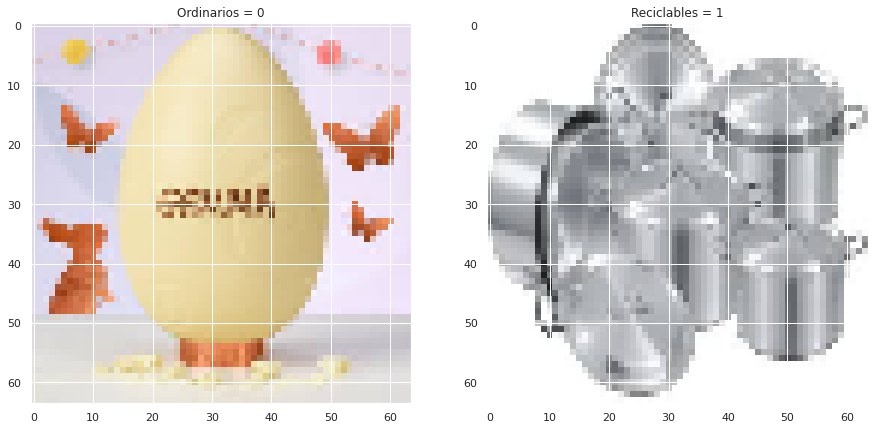

In [11]:
#Visualizar imagenes ordinarias y reciclabes
plt.figure(figsize=(15, 8))
plt.subplot(121)
plt.imshow(X_train[0,:,:,:])
plt.title('Ordinarios = '+str(y_train[0]))
plt.subplot(122)
plt.imshow(X_train[6765,:,:,:])
plt.title('Reciclables = '+str(y_train[6755]))

In [12]:
y_train

array([0, 0, 0, ..., 1, 1, 1])

## Segmentación

### Visualización de imagen en el espacio de color RGB

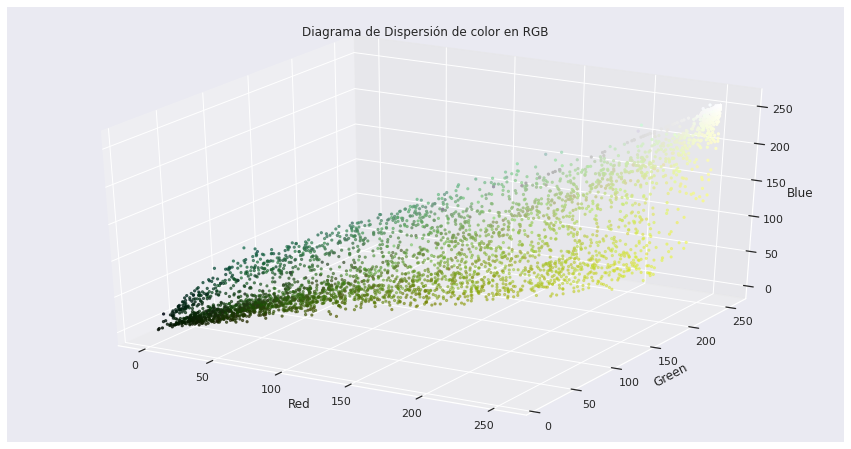

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

image = (X_train[0,:,:,:])

r, g, b = cv2.split(image)
fig = plt.figure(figsize=(15, 8))
axis = fig.add_subplot(1, 1, 1, projection="3d")

#Normalizar
pixel_colors = image.reshape((np.shape(image)[0]*np.shape(image)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

# Trazar las posiciones de los píxeles para cada eje y sus colores correspondientes
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_title("Diagrama de Dispersión de color en RGB")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

### Visualización de imagen en el espacio de color HSV

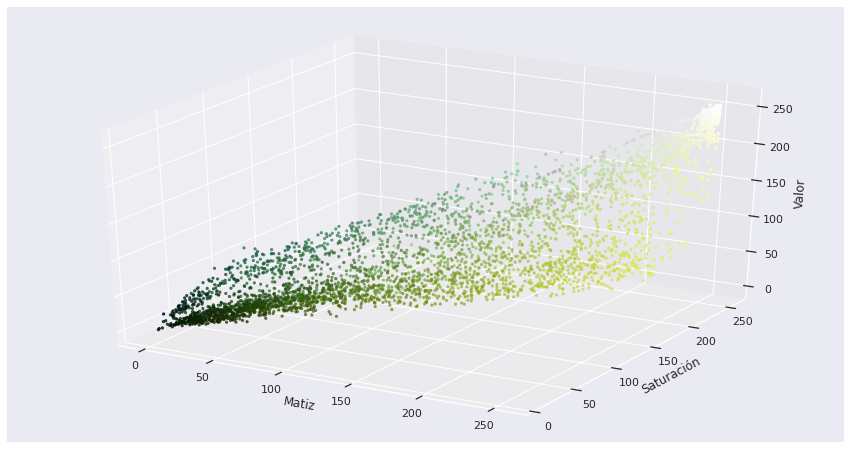

In [ ]:
hsv_image = (X_train[0,:,:,:])

h, s, v = cv2.split(hsv_image)
fig = plt.figure(figsize=(15, 8))
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Matiz")
axis.set_ylabel("Saturación")
axis.set_zlabel("Valor")
plt.show()



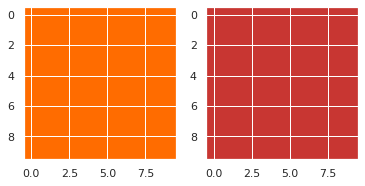

In [ ]:
from matplotlib.colors import hsv_to_rgb

light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

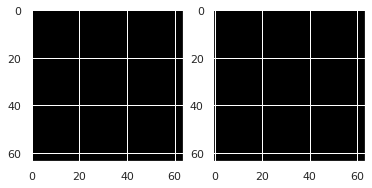

In [ ]:
mask = cv2.inRange(hsv_image, light_orange, dark_orange)
result = cv2.bitwise_and(image, image, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

## Análisis Exploratorio de Datos - EDA

In [13]:
#Convertir de un numpy a pandas X_train_new
pixel = []
for i in range(X_train_new.shape[1]):
    pixel.append('pixel_{}'.format(i))

X_train_df = pd.DataFrame(X_train_new,columns=pixel)
X_train_df['tipo_residuo'] = y_train
X_train_df.index.name='image'
X_train_df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_12249,pixel_12250,pixel_12251,pixel_12252,pixel_12253,pixel_12254,pixel_12255,pixel_12256,pixel_12257,pixel_12258,pixel_12259,pixel_12260,pixel_12261,pixel_12262,pixel_12263,pixel_12264,pixel_12265,pixel_12266,pixel_12267,pixel_12268,pixel_12269,pixel_12270,pixel_12271,pixel_12272,pixel_12273,pixel_12274,pixel_12275,pixel_12276,pixel_12277,pixel_12278,pixel_12279,pixel_12280,pixel_12281,pixel_12282,pixel_12283,pixel_12284,pixel_12285,pixel_12286,pixel_12287,tipo_residuo
image,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,220,211,231,218,210,230,218,209,230,218,209,230,218,209,230,218,209,230,218,209,230,219,210,231,219,210,231,219,210,231,220,211,232,221,212,233,221,212,233,221,...,227,222,219,224,223,219,224,223,219,224,223,219,224,223,219,224,223,219,224,223,219,224,223,219,222,221,219,222,221,219,222,221,219,222,221,219,222,221,219,0
1,210,184,171,211,185,172,209,183,170,192,165,153,182,154,140,195,163,148,185,152,135,184,155,145,200,151,112,188,94,64,204,154,119,190,142,121,219,162,138,207,...,144,131,114,197,181,168,165,149,136,157,141,128,104,88,75,131,111,102,102,74,64,149,118,107,130,86,63,150,115,94,31,3,1,65,32,18,69,36,21,0
2,219,202,194,217,200,192,209,192,184,206,189,181,201,186,181,204,189,186,201,185,186,192,177,177,71,61,62,51,43,44,58,58,56,99,100,99,123,124,129,136,...,159,20,7,172,24,14,164,22,10,150,17,2,158,27,13,148,35,21,151,83,58,121,106,67,133,102,73,138,104,76,139,104,76,141,104,76,143,107,75,0
3,47,60,19,45,60,7,91,108,44,59,69,39,39,48,28,53,66,22,76,89,44,91,104,77,121,139,87,23,46,5,166,189,102,147,173,84,55,62,26,28,...,154,181,79,100,117,47,96,119,31,133,159,68,176,206,108,80,105,20,76,91,41,100,124,35,138,168,75,162,186,110,205,230,138,100,118,60,72,91,24,0
4,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6763,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6764,191,78,65,192,93,80,206,109,101,210,111,95,217,98,60,220,84,10,232,70,0,222,68,1,206,58,0,156,50,0,90,32,3,21,13,9,33,24,17,92,...,108,98,88,109,99,89,109,99,89,109,99,89,108,98,88,108,98,88,111,97,88,111,97,88,110,97,88,107,97,87,105,95,85,103,93,83,103,93,83,1
6765,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1


In [14]:
#Convertir de un numpy a pandas X_test
pixel = []
for i in range(X_test_new.shape[1]):
    pixel.append('pixel_{}'.format(i))

X_test_df = pd.DataFrame(X_test_new,columns=pixel)
X_test_df['tipo_residuo'] = y_test
X_test_df.index.name='image'
X_test_df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_12249,pixel_12250,pixel_12251,pixel_12252,pixel_12253,pixel_12254,pixel_12255,pixel_12256,pixel_12257,pixel_12258,pixel_12259,pixel_12260,pixel_12261,pixel_12262,pixel_12263,pixel_12264,pixel_12265,pixel_12266,pixel_12267,pixel_12268,pixel_12269,pixel_12270,pixel_12271,pixel_12272,pixel_12273,pixel_12274,pixel_12275,pixel_12276,pixel_12277,pixel_12278,pixel_12279,pixel_12280,pixel_12281,pixel_12282,pixel_12283,pixel_12284,pixel_12285,pixel_12286,pixel_12287,tipo_residuo
image,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,145,94,79,151,103,99,121,106,104,128,111,121,130,102,96,202,157,127,242,194,154,240,194,160,233,180,144,169,121,81,169,119,95,166,120,89,153,110,79,137,...,96,87,46,102,89,50,105,90,51,107,87,50,122,98,64,131,106,75,129,104,75,132,107,77,125,102,70,127,106,75,106,92,58,92,84,47,80,75,33,0
1,166,2,16,196,92,28,210,108,46,189,60,0,207,156,121,197,200,176,186,168,119,231,209,133,183,163,89,131,115,27,205,185,130,183,166,135,137,123,38,228,...,166,128,56,151,102,29,118,70,4,231,203,154,224,195,153,216,188,141,201,166,111,179,136,72,176,134,74,90,54,14,235,204,152,223,203,161,211,180,130,0
2,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,0
3,224,225,228,223,224,228,220,220,231,226,225,239,241,250,249,165,167,167,142,139,138,150,142,140,150,147,138,148,145,136,148,145,136,140,137,128,143,135,122,137,...,252,252,250,247,247,249,248,249,253,239,242,248,241,242,246,243,244,249,233,236,243,228,232,241,220,229,236,214,222,233,210,219,229,211,220,224,201,205,208,0
4,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,237,232,100,234,231,91,239,231,97,234,231,100,232,232,105,232,227,119,225,216,134,207,199,155,187,175,177,164,152,185,154,145,192,159,147,204,159,151,204,158,...,249,247,250,249,247,250,249,247,250,249,247,250,249,247,250,249,247,250,248,246,249,248,246,249,248,246,249,248,246,249,248,246,249,248,246,249,248,246,249,1
749,72,56,40,77,58,39,75,58,38,76,59,39,80,66,46,80,75,56,77,72,53,77,74,55,86,78,56,93,79,53,99,85,59,91,80,54,97,82,54,101,...,159,139,66,148,121,98,147,118,99,148,120,96,149,122,97,139,113,88,135,109,86,140,114,92,138,109,88,128,94,69,117,94,71,102,86,71,98,80,59,1
750,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1


In [15]:
samples,features = X_train_df.shape

duplicated = X_train_df.duplicated().sum()
null_values = X_train_df.isnull().sum().sum()

print('DATOS BASICOS EDA')
print('Número de imágenes: %d'%(samples))
print('Número de caracteristicas: %d'%(features))
print('Número de valores duplicados: %d'%(duplicated))
print('Número de muestras nulas: %d' % (null_values))


DATOS BASICOS EDA
Número de imágenes: 6768
Número de caracteristicas: 12289
Número de valores duplicados: 6
Número de muestras nulas: 0


In [16]:
#Distribución de los datos
X_train_df['tipo_residuo'].value_counts()

0    3769
1    2999
Name: tipo_residuo, dtype: int64

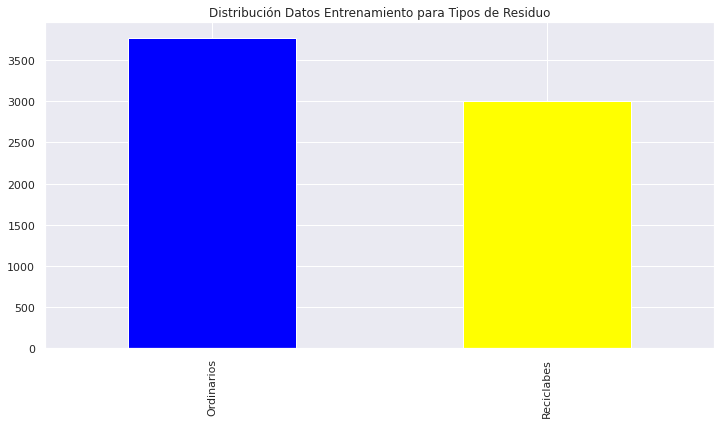

In [17]:
#Verificar graficamente la distribución de los datos
plt.figure(figsize=(12,6))
logpatterns_counts = X_train_df['tipo_residuo'].value_counts().sort_index()
patterns_colors = ['Blue','Yellow']
patterns_labels = ['Ordinarios', 'Reciclabes']
#use facies labels to index each count
logpatterns_counts.index = patterns_labels

logpatterns_counts.plot(kind='bar',color=patterns_colors, 
                         title='Distribución Datos Entrenamiento para Tipos de Residuo')
logpatterns_counts
plt.show()

In [18]:
#Distribución de los datos con las etiquetas
logpatterns_counts

Ordinarios    3769
Reciclabes    2999
Name: tipo_residuo, dtype: int64

**Lo que sabemos hasta ahora**
- Nuestro conjunto de datos contiene una cantidad razonable de imágenes.
- No se requiere limpieza de datos
- El análisis exploratorio de datos se realiza con respecto a los metadatos, ya  que no tenemos información adicional.
- Podemos investigar patrones de imagen y relaciones entre las clases.
- Los datos están desbalanceados, el 55% de los datos pertenecen a la clase "Ordinarios" y el 45% a la clase "Reciclabes"
- Debido al desequilibrio de datos, es mejor utilizar métricas como Precision, Recall o F1-Score para medir el rendimiento del modelo.

### Datos de imagen EDA
En esta sección, se presenta un EDA sobre los datos de la imagen. Aquí se investiga cualquier patrón / relación con respecto a las imágenes y sus respectivas clases.

Primero, echemos un vistazo a una muestra aleatoria y extraigamos información básica sobre las imágenes:

In [19]:
X_train_new[0:]

array([[220, 211, 231, ..., 222, 221, 219],
       [210, 184, 171, ...,  69,  36,  21],
       [219, 202, 194, ..., 143, 107,  75],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [ 28,  27,  25, ...,  31,  23,  21],
       [ 92, 119,  64, ...,  93,  60,  27]], dtype=uint8)

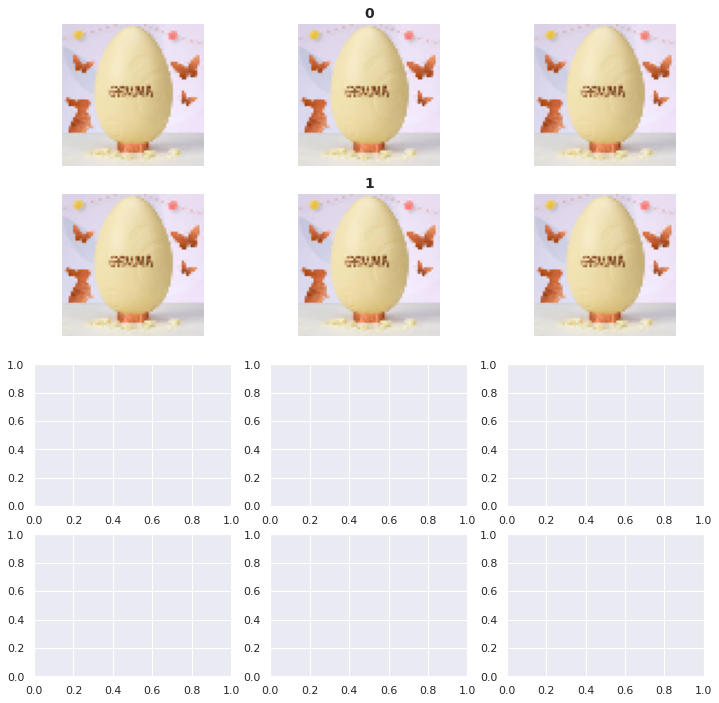

In [20]:
#--------------- falta corregir error  presentado ---------
#Image Sampling
n_samples = 3

fig, m_axs = plt.subplots(4, n_samples, figsize = (4*n_samples, 3*4))
#df[df.tipo_residuo==0]

for n_axs, (type_name, type_rows) in zip(m_axs,X_train_df.sort_values(['tipo_residuo']).groupby('tipo_residuo')):
    n_axs[1].set_title(type_name,fontsize = 14,weight = 'bold')
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):       
        image = X_train[0]
        #image = cv2.imread(picture)
        c_ax.imshow(image)
        c_ax.axis('off')

En una imagen RGB, cada píxel está representado por tres números de 8 bits asociados con los valores de rojo, verde y azul, respectivamente. Los números van de 0 a 255 para los tres canales diferentes.

El conjunto de datos presenta las imágenes como .JPG. Usando la biblioteca cv2, el color de las imágenes se muestra correctamente.

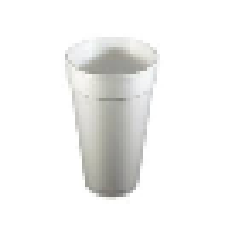

In [21]:
plt.figure()
pic_id = random.randrange(0, samples)
image = X_train[pic_id,:,:,:]
plt.imshow(image)
plt.axis('off');
plt.show()  

Comprobación de los parámetros básicos de la imagen

In [22]:
print('Shape of the image : {}'.format(image.shape))
print('Image Hight {}'.format(image.shape[0]))
print('Image Width {}'.format(image.shape[1]))
print('Dimension of Image {}'.format(image.ndim))
print('Image size {}'.format(image.size))
print('Image Data Type {}'.format(image.dtype))
print('Maximum RGB value in this image {}'.format(image.max()))
print('Minimum RGB value in this image {}'.format(image.min()))

Shape of the image : (64, 64, 3)
Image Hight 64
Image Width 64
Dimension of Image 3
Image size 12288
Image Data Type uint8
Maximum RGB value in this image 255
Minimum RGB value in this image 110


Las imágenes presentan los tres canales.

La salida a continuación es un píxel único de la matriz de imágenes en [0,0], vemos que todos los canales de color presetan valores diferentes.

Como nota al margen, OpenCV asume que la imagen es Azul-Verde-Rojo (BGR), no RGB.

In [23]:
image[0,0]

array([255, 255, 255], dtype=uint8)

A continuación se muestra una visualización de la imagen seleccionando en los tres canales.

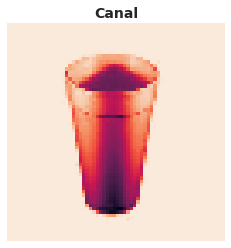

In [24]:
plt.title('Canal',fontsize = 14,weight = 'bold')
plt.imshow(image[:,:,0])
plt.axis('off');
plt.show()

Como se mostró hasta ahora, las imágenes no son más que una matriz de números en un formato [Alto, Ancho, Canal]. Con eso en mente, procedemos con nuestra EDA.

Aquí comenzamos a examinar si existe algún patrón entre los valores de color de la imagen y su clase. Una gráfica de distribución ilustra cómo se presentan los valores de color medio, máximo y mínimo para el conjunto de datos. 

In [25]:
mean_val = []
std_dev_val = []
max_val = []
min_val = []

for i in range(0,samples):    
    mean_val.append(X_train[i].mean())
    std_dev_val.append(np.std(X_train[i]))
    max_val.append(X_train[i].max())
    min_val.append(X_train[i].min())

imageEDA = X_train_df.loc[:,['tipo_residuo']]
imageEDA['mean'] = mean_val
imageEDA['stedev'] = std_dev_val
imageEDA['max'] = max_val
imageEDA['min'] = min_val

subt_mean_samples = imageEDA['mean'].mean() - imageEDA['mean']
imageEDA['subt_mean'] = subt_mean_samples

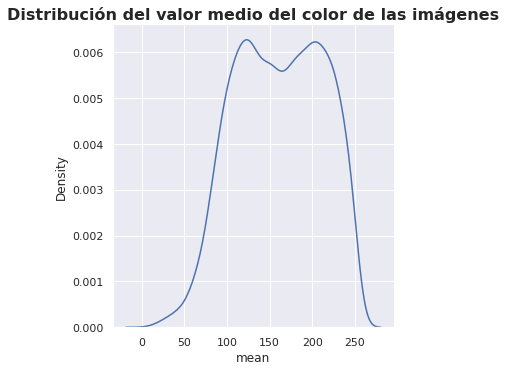

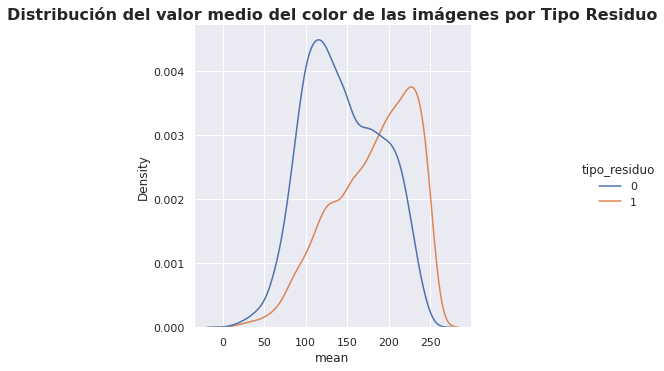

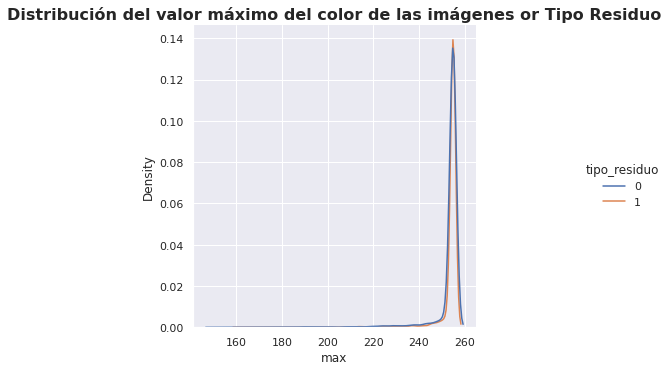

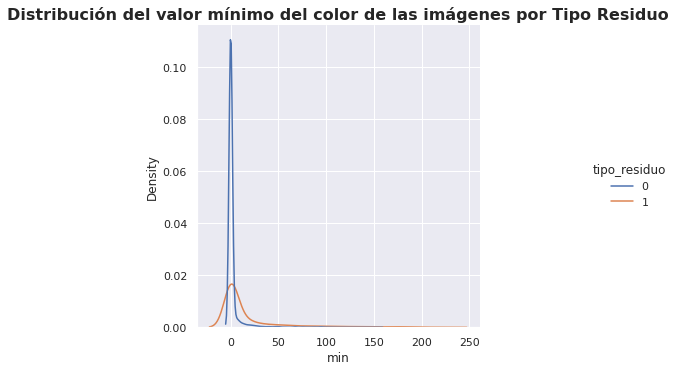

In [26]:
ax = sns.displot(data = imageEDA, x = 'mean', kind="kde");
plt.title('Distribución del valor medio del color de las imágenes', fontsize = 16,weight = 'bold');
ax = sns.displot(data = imageEDA, x = 'mean', kind="kde", hue = 'tipo_residuo');
plt.title('Distribución del valor medio del color de las imágenes por Tipo Residuo', fontsize = 16,weight = 'bold');
ax = sns.displot(data = imageEDA, x = 'max', kind="kde", hue = 'tipo_residuo');
plt.title('Distribución del valor máximo del color de las imágenes or Tipo Residuo', fontsize = 16,weight = 'bold');
ax = sns.displot(data = imageEDA, x = 'min', kind="kde", hue = 'tipo_residuo');
plt.title('Distribución del valor mínimo del color de las imágenes por Tipo Residuo', fontsize = 16,weight = 'bold');

**Ejemplo de análisis de datos para ajustarlos**

- La gráfica de distribución de todo el conjunto de datos es muy similar a las imágenes individuales de Healthy y Lung Opacity, debido al número de muestras de estas dos clases.
- Separando por clase podemos visualizar que los valores de Media, Max y Min varían según la clase de imagen
- La neumonía viral es la única clase que presenta una distribución normal en los tres análisis diferentes.
- El valor máximo posible para una imagen es 255. La mayoría de las clases alcanzan su punto máximo alrededor de este número como se esperaba.
- La Neumonía Viral es la clase que presenta más muestras con valores Max más bajos si se compara con las demás. La mayoría de las muestras están dentro del rango de 200 a 225
- Las muestras Normal (Saludable) y Opacidad Pulmonar presentan una distribución muy similar de sus valores medios. No estoy seguro de si esto podría estar relacionado con el hecho de que estas clases son las más numerosas del conjunto de datos. Los diferentes picos en la distribución también podrían deberse a la fuente de la imagen (por ejemplo, dos hospitales diferentes)
- Respecto a los valores Max, Lung Opacity y Covid-19 presentan distribuciones similares (ver los "golpes"), mientras que los pacientes Normales tienen un pico en 150 y luego otro pico alrededor de 250


Continuando nuestro análisis con los valores medios, ahora analizamos la relación entre el valor medio de una imagen y su desviación estándar.

Text(0.5, 1.0, 'Mean and Standard Deviation of Image Samples')

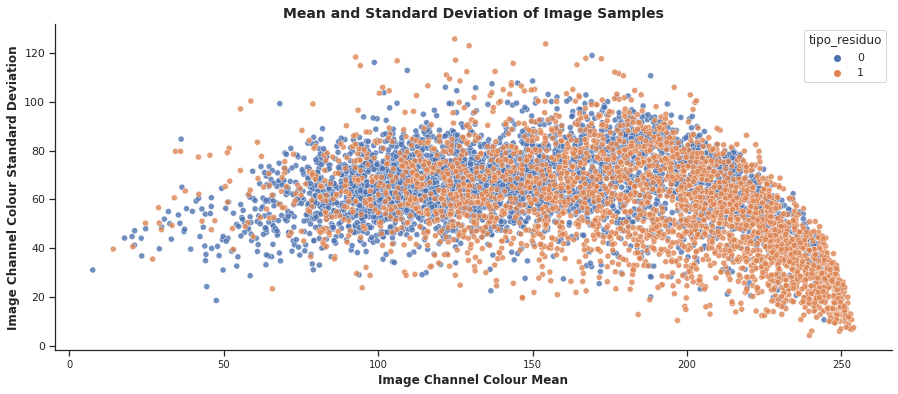

In [27]:
plt.figure(figsize=(15,6))
sns.set(style="ticks", font_scale = 1)
ax = sns.scatterplot(data=imageEDA, x="mean", y=imageEDA['stedev'], hue = 'tipo_residuo',alpha=0.8);
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=0,fontsize = 10)
ax.set_xlabel('Image Channel Colour Mean',fontsize = 12,weight = 'bold')
ax.set_ylabel('Image Channel Colour Standard Deviation',fontsize = 12,weight = 'bold')
plt.title('Mean and Standard Deviation of Image Samples', fontsize = 14,weight = 'bold')

**Ejemplo de análisis de datos para ajustarlos**

La mayoría de las imágenes se recopilan en la región central del diagrama de dispersión, es decir, no hay mucho contraste entre sus valores de píxeles.
Las muestras de Covid-19 parecen ser la única clase que tiene un pequeño grupo de datos en la parte inferior izquierda de la gráfica, donde se encuentran las muestras con una media más baja y una variación estándar baja.
Se requiere una trama individual por clase, ya que las clases están una encima de la otra y podríamos perder detalles importantes.
Vemos que todas las clases tienen valores atípicos distribuidos alrededor del área periférica del gráfico. Será interesante usar la visualización para comprender cómo se ven los valores atípicos
La trama de arriba está abarrotada, analicemos por clase por separado:

<Figure size 1080x432 with 0 Axes>

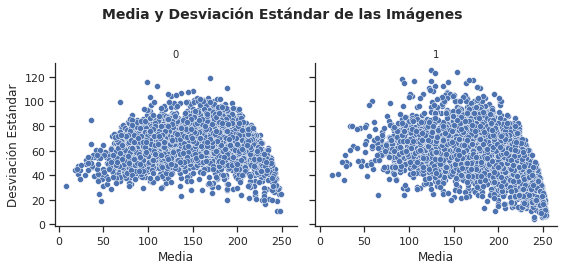

In [28]:
plt.figure(figsize=(15,6));
patterns_labels = ['Ordinarios', 'Reciclabes']
g = sns.FacetGrid(imageEDA, col="tipo_residuo",height=4);
g.map_dataframe(sns.scatterplot, x='mean', y='stedev');
g.set_titles(col_template="{col_name}", row_template="{row_name}", size = 10)
g.fig.subplots_adjust(top=.2)
g.fig.suptitle('Media y Desviación Estándar de las Imágenes',fontsize=14, weight = 'bold')
axes = g.axes.flatten()
axes[0].set_ylabel('Desviación Estándar');
for ax in axes:
    ax.set_xlabel('Media')
g.fig.tight_layout()

**Ejemplo de análisis de datos para ajustarlos**

Las muestras normales (sanas) y las imágenes de opacidad pulmonar tienen una dispersión similar, con la mayoría de sus valores atípicos con una desviación estándar más alta y valores medios más bajos.
Las imágenes de neumonía viral muestran una dispersión más concentrada, quizás estas imágenes tienen una mayor similitud entre sí que en comparación con las otras clases
La dispersión Covid-19 no se parece a ninguna de las otras tres clases. Presenta más valores atípicos que las otras clases y los puntos están más dispersos en el gráfico. Podría indicar que las imágenes tienen una mayor distinción entre sí
La visualización a continuación se inspiró en una charla en PyData 2016, de Mehrdad Yazdani con el título Uso del análisis de datos exploratorios para descubrir patrones. Realmente ayuda a aclarar las cosas para ver los datos de las imágenes en un formato de gráfico. La ubicación de los puntos del gráfico de dispersión anterior se utiliza como referencia para las ubicaciones de las imágenes.

Debido al tiempo que tarda en cargarse, el 10% de los datos se utiliza para la visualización.

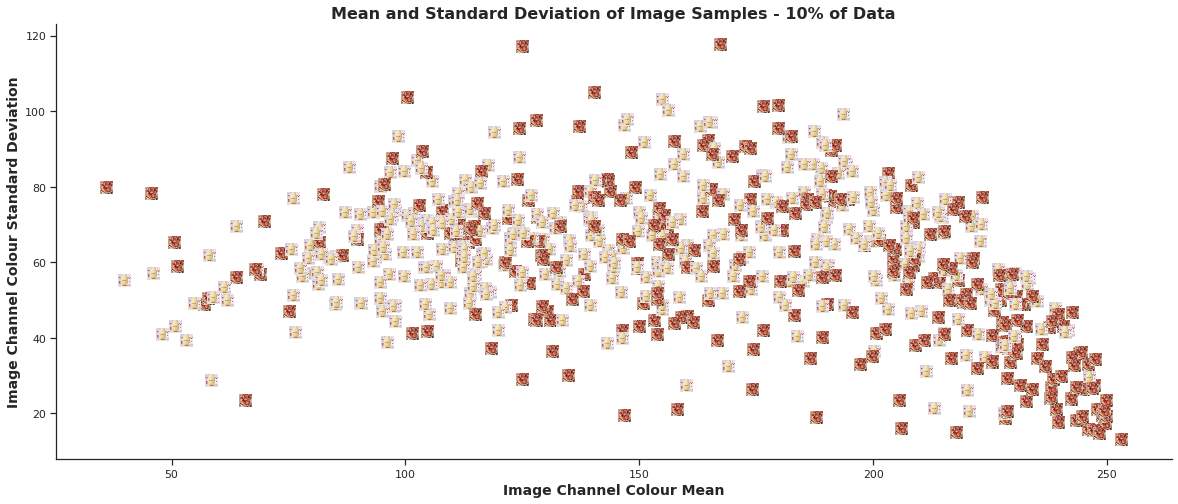

In [29]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path):
    return OffsetImage(X_train[path],zoom = 0.2)

DF_sample = imageEDA.sample(frac=0.1, replace=False, random_state=1)
paths = DF_sample['tipo_residuo']

fig, ax = plt.subplots(figsize=(20,8))
ab = sns.scatterplot(data=DF_sample, x="mean", y='stedev')
sns.despine(top=True, right=True, left=False, bottom=False)
ax.set_xlabel('Image Channel Colour Mean',fontsize = 14,weight = 'bold')
ax.set_ylabel('Image Channel Colour Standard Deviation',fontsize = 14,weight = 'bold')
plt.title('Mean and Standard Deviation of Image Samples - 10% of Data', fontsize = 16,weight = 'bold');

for x0, y0, path in zip(DF_sample['mean'], DF_sample['stedev'],paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

##Balanceo de Datos

In [47]:
#Convertir de un numpy a pandas
target = X_train_df['tipo_residuo']

Reciclable = target.sum()
Ordinario = target.shape[0]- Reciclable
print('Residuos Ordinarios ', Ordinario, ' , Residuos Reciclables: ', Reciclable )

Residuos Ordinarios  3769  , Residuos Reciclables:  2999


###Sobremuestreo

In [ ]:
#Importamos los paquetes
from imblearn.over_sampling import RandomOverSampler, SMOTE

#Inicialización de los métodos de sobremuestreo
#ROS
ros = RandomOverSampler()#random_state = 0
#SMOTE
smote = SMOTE()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#ROS. Duplica muestras de la clase menos representadas
dataRos, targetRos = ros.fit_resample(X_train_df,target)
OrdinarioRos = targetRos.sum()
OrdinarioRos = targetRos.shape[0]- OrdinarioRos
print('Residuos Ordinarios: ', OrdinarioRos, ' , Residuos Reciclables: ', OrdinarioRos )
dataRos

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Residuos Ordinarios:  1256  , Residuos Reciclables:  1256


array([[  1,  39,   0, ..., 206,  17,   0],
       [ 24,  24,  24, ...,  85,  90,   0],
       [255, 255, 255, ..., 255, 255,   0],
       ...,
       [242, 238, 227, ..., 208, 196,   1],
       [255, 255, 255, ..., 255, 255,   1],
       [255, 255, 255, ..., 255, 255,   1]])

In [ ]:
#SMOTE. Genera nuevas muestras sintéticas
dataSmote, targetSmote = smote.fit_resample(X_train_df,target)
OrdinarioSmote = targetSmote.sum()
reciclableSmote = targetSmote.shape[0]- OrdinarioSmote
print('Residuos Ordinarios: ', OrdinarioSmote, ' , Residuos Reciclables: ', reciclableSmote )
dataSmote

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Residuos Ordinarios:  1256  , Residuos Reciclables:  1256


array([[  1,  39,   0, ..., 206,  17,   0],
       [ 24,  24,  24, ...,  85,  90,   0],
       [255, 255, 255, ..., 255, 255,   0],
       ...,
       [209, 209, 208, ..., 231, 231,   1],
       [255, 255, 255, ..., 255, 255,   1],
       [ 53,  30,  29, ..., 124, 106,   1]])

###Submuestreo

In [ ]:
#Importamos los paquetes
from imblearn.under_sampling import RandomUnderSampler, NearMiss

#Inicialización de los métodos de submuestreo
#RUS
rus = RandomUnderSampler()#random_state = 0
#NearMiss
nm = NearMiss()

In [ ]:
#RUS. Elimina muestras de la clase más representada aleatoriamente
dataRus, targetRus = rus.fit_resample(X_train_df,target)
ReciclableRus = targetRus.sum()
OrdinarioRus = targetRus.shape[0]- ReciclableRus
print('Residuos Ordinarios: ', OrdinarioRus, ' , Residuos Reciclables: ', ReciclableRus )
dataRus

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Residuos Ordinarios:  999  , Residuos Reciclables:  999


array([[233, 234, 236, ..., 168, 176,   0],
       [ 85, 121, 111, ..., 179, 106,   0],
       [102, 129,  74, ..., 254, 254,   0],
       ...,
       [178, 178, 176, ..., 193, 192,   1],
       [255, 255, 255, ..., 255, 255,   1],
       [ 81,  80,  78, ..., 255, 255,   1]])

In [ ]:
#NearMiss. Elimina las muestras más cercanas de la clase más representada
dataNm, targetNm = nm.fit_resample(X_train_df,target)
OrdinarioNm = targetNm.sum()
ReciclableNm = targetNm.shape[0]- OrdinarioNm
print('Residuos Ordinarios: ', OrdinarioNm, ' , Residuos Reciclables: ', ReciclableNm )
dataNm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Residuos Ordinarios:  999  , Residuos Reciclables:  999


array([[255, 255, 255, ..., 255, 255,   0],
       [255, 255, 255, ..., 255, 255,   0],
       [255, 255, 255, ..., 255, 255,   0],
       ...,
       [178, 178, 176, ..., 193, 192,   1],
       [255, 255, 255, ..., 255, 255,   1],
       [ 81,  80,  78, ..., 255, 255,   1]])

###Sobremuestreo + Submuestreo

In [ ]:
from imblearn.combine import SMOTETomek

#Inicialización del método combinado
#SMOTE Tomek (Uniones de tomek)
smoteT = SMOTETomek()#random_state = 0

In [ ]:
#Smote-Tomek. Sobremuestreo con Smote seguido de un submuestreo con Uniones de Tomek
datasmoteT, targetsmoteT = smoteT.fit_resample(X_train_df,target)
OrdinariomoteT = targetsmoteT.sum()
ReciclablemoteT = targetsmoteT.shape[0]- OrdinariomoteT
print('Residuos Ordinarios:', OrdinariomoteT, ' , T Residuos Reciclables: ', ReciclablemoteT )
datasmoteT

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Residuos Ordinarios: 1251  , T Residuos Reciclables:  1251


array([[  1,  39,   0, ..., 206,  17,   0],
       [ 24,  24,  24, ...,  85,  90,   0],
       [255, 255, 255, ..., 255, 255,   0],
       ...,
       [251, 251, 251, ..., 251, 251,   1],
       [200, 197, 188, ..., 207, 199,   1],
       [ 87,  63,  40, ...,  44,  33,   1]])

## Selección de Caracteristicas

In [48]:
import tensorflow as tf
from time import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [49]:
def show_image_mosaic(imgs, labels, figsize=(12, 12), idxs=None):

    plt.figure(figsize=figsize)
    for labi,lab in [i for i in enumerate(np.unique(labels))]:
        k = imgs[labels == lab]
        _idxs = idxs[:10] if idxs is not None else np.random.permutation(len(k))[:10]
        for i, idx in enumerate(_idxs):
            if i == 0:
                plt.subplot(10, 11, labi*11+1)
                plt.title("LABEL %d" % lab)
                plt.plot(0, 0)
                plt.axis("off")

            img = k[idx]
            plt.subplot(10, 11, labi*11+i+2)
            plt.imshow(img, cmap=plt.cm.Greys_r)
            plt.axis("off")          

In [50]:
def show_change(img, arr_antes, arr_despues, cambio):
  plt.subplot(121),plt.imshow(arr_antes[img,:,:,:]),plt.title('Original')
  plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(arr_despues[img,:,:,:]),plt.title(str(cambio))
  plt.xticks([]), plt.yticks([])
  plt.show()

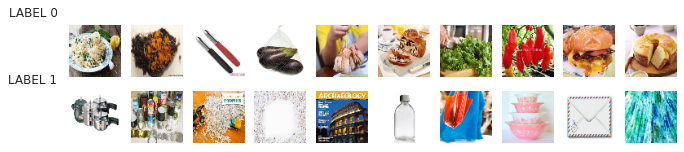

In [51]:
show_image_mosaic(X_train, y_train)

### Aumento de Contraste

Realizamos ahora una transformación sencilla sobre las imágenes usando las herramientas de TF

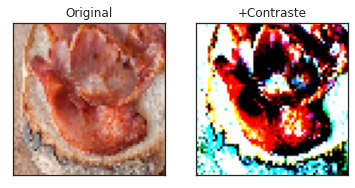

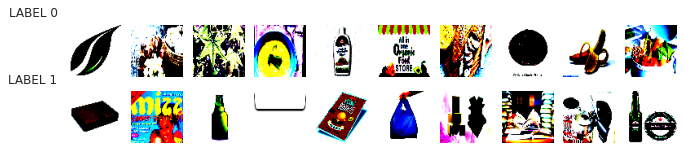

In [52]:
tf.compat.v1.disable_eager_execution()

timgs = tf.compat.v1.placeholder(dtype=tf.uint8, shape=(None,64,64,3))
cimgs = tf.image.adjust_contrast(timgs, 10.)

with tf.compat.v1.Session() as sess:  
  cx_train = sess.run(cimgs, feed_dict={timgs: X_train})
  cx_test = sess.run(cimgs, feed_dict={timgs: X_test})

show_change(1, X_train, cx_train, '+Contraste')
show_image_mosaic(cx_train, y_train)

In [53]:
cx_train.shape, cx_test.shape, 

((6768, 64, 64, 3), (753, 64, 64, 3))

### Aumentar brillo

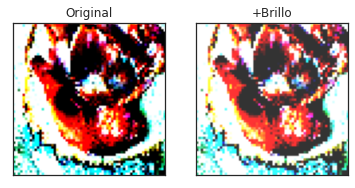

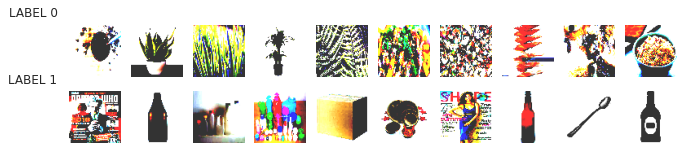

In [54]:
tf.compat.v1.disable_eager_execution()

timgs = tf.compat.v1.placeholder(dtype=tf.uint8, shape=(None,64,64,3))
cimgs = tf.image.adjust_brightness(timgs, delta=0.2)

with tf.compat.v1.Session() as sess:  
  bx_train = sess.run(cimgs, feed_dict={timgs: cx_train})
  bx_test = sess.run(cimgs, feed_dict={timgs: cx_test})

show_change(1, cx_train, bx_train, '+Brillo')
show_image_mosaic(bx_train, y_train)

In [55]:
bx_train.shape, bx_test.shape

((6768, 64, 64, 3), (753, 64, 64, 3))

### Quitar ruido (Difuminar)

In [56]:
#funcion para blurear
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def get_blur (imgs_input):
  imgs_output = []

  for img in imgs_input:
    img_blur = cv.blur(img,(3,3))
    imgs_output.append(img_blur)
  
  return np.asarray(imgs_output)

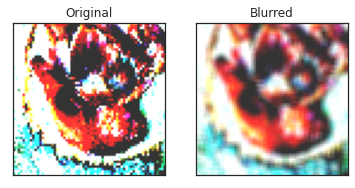

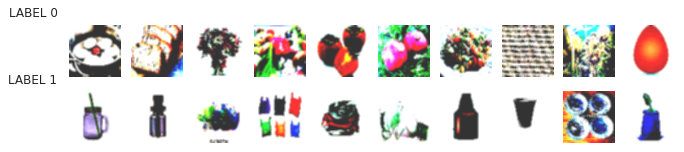

In [57]:
#Obtener imagenes con desefoque

rx_train = get_blur(bx_train)
rx_test = get_blur(bx_test)

show_change(1, bx_train, rx_train, 'Blurred')
show_image_mosaic(rx_train, y_train)

In [58]:
rx_train.shape, rx_test.shape

((6768, 64, 64, 3), (753, 64, 64, 3))

### Detección de borde

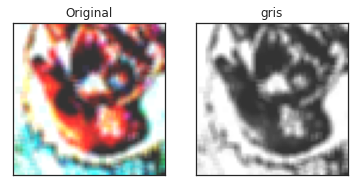

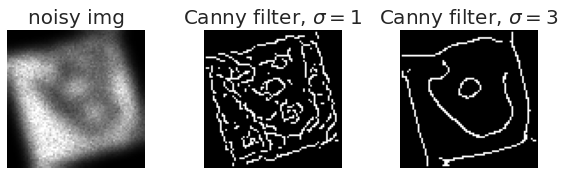

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage import feature
from skimage.feature import greycomatrix, greycoprops
import cv2


#convertit imagen a escala de grises
img = rx_train[1,:,:,:] 
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.subplot(121),plt.imshow(rx_train[1,:,:,:] ),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img, cmap='gray', vmin = 0, vmax = 255),plt.title('gris')
plt.xticks([]), plt.yticks([])
plt.show()

# Generate noisy image of a square
img = ndi.rotate(img, 15, mode='constant')
img = ndi.gaussian_filter(img, 4)
img = random_noise(img, mode='speckle', mean=0.1)



# Compute the Canny filter for two values of sigma
edges1 = feature.canny(img)
edges2 = feature.canny(img, sigma=3)

# display results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('noisy img', fontsize=20)

ax[1].imshow(edges1, cmap='gray')
ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax[2].imshow(edges2, cmap='gray')
ax[2].set_title(r'Canny filter, $\sigma=3$', fontsize=20)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

### Alargar imágenes

In [60]:
# REVISAR!!!!!!!!!! Asignar imagenes preporcesadas y aplanarlas
#Obtener muestras de cada etiqueta (Imágenes a color en tres canales)
nsamples, nx, ny, ncha = rx_train.shape
nsamples2, nx2, ny2, ncha2 = rx_test.shape
X_train_new_rx = rx_train.reshape((nsamples,nx*ny*ncha)) # Alargar la imagen
X_test_new_rx = rx_test.reshape((nsamples2,nx2*ny2*ncha2))

#Colocar bien la etiqueta (O:Ordinarios --> 0, R:Reciclabes --> 1)
encoder = LabelEncoder() #Transformación de las etiquetas de letra a números.
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

X_train_new_rx.shape, X_test_new_rx.shape, y_train.shape, y_test.shape

((6768, 12288), (753, 12288), (6768,), (753,))

## Selección de Caracteristicas Importantes (**ESTO NO VA**)

Se trabaja con los datos de X_train y X_teste convertidos a un dataframe de Panda

In [44]:
#Se elimina columna del target para X_train y X_test
X_train_df = X_train_df.drop(['tipo_residuo'],axis=1)
X_test_df = X_test_df.drop(['tipo_residuo'],axis=1)


In [45]:
X_test_df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_12248,pixel_12249,pixel_12250,pixel_12251,pixel_12252,pixel_12253,pixel_12254,pixel_12255,pixel_12256,pixel_12257,pixel_12258,pixel_12259,pixel_12260,pixel_12261,pixel_12262,pixel_12263,pixel_12264,pixel_12265,pixel_12266,pixel_12267,pixel_12268,pixel_12269,pixel_12270,pixel_12271,pixel_12272,pixel_12273,pixel_12274,pixel_12275,pixel_12276,pixel_12277,pixel_12278,pixel_12279,pixel_12280,pixel_12281,pixel_12282,pixel_12283,pixel_12284,pixel_12285,pixel_12286,pixel_12287
image,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,145,94,79,151,103,99,121,106,104,128,111,121,130,102,96,202,157,127,242,194,154,240,194,160,233,180,144,169,121,81,169,119,95,166,120,89,153,110,79,137,...,47,96,87,46,102,89,50,105,90,51,107,87,50,122,98,64,131,106,75,129,104,75,132,107,77,125,102,70,127,106,75,106,92,58,92,84,47,80,75,33
1,166,2,16,196,92,28,210,108,46,189,60,0,207,156,121,197,200,176,186,168,119,231,209,133,183,163,89,131,115,27,205,185,130,183,166,135,137,123,38,228,...,131,166,128,56,151,102,29,118,70,4,231,203,154,224,195,153,216,188,141,201,166,111,179,136,72,176,134,74,90,54,14,235,204,152,223,203,161,211,180,130
2,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
3,224,225,228,223,224,228,220,220,231,226,225,239,241,250,249,165,167,167,142,139,138,150,142,140,150,147,138,148,145,136,148,145,136,140,137,128,143,135,122,137,...,251,252,252,250,247,247,249,248,249,253,239,242,248,241,242,246,243,244,249,233,236,243,228,232,241,220,229,236,214,222,233,210,219,229,211,220,224,201,205,208
4,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,237,232,100,234,231,91,239,231,97,234,231,100,232,232,105,232,227,119,225,216,134,207,199,155,187,175,177,164,152,185,154,145,192,159,147,204,159,151,204,158,...,250,249,247,250,249,247,250,249,247,250,249,247,250,249,247,250,249,247,250,248,246,249,248,246,249,248,246,249,248,246,249,248,246,249,248,246,249,248,246,249
749,72,56,40,77,58,39,75,58,38,76,59,39,80,66,46,80,75,56,77,72,53,77,74,55,86,78,56,93,79,53,99,85,59,91,80,54,97,82,54,101,...,40,159,139,66,148,121,98,147,118,99,148,120,96,149,122,97,139,113,88,135,109,86,140,114,92,138,109,88,128,94,69,117,94,71,102,86,71,98,80,59
750,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255


In [46]:
import lightgbm as lgb

# Inicializar una matriz vacía para mantener la importancia de las características
feature_importances = np.zeros(X_train_df.shape[1])

# Crea el modelo con varios hiperparámetros
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

In [ ]:
# Entrenar el modelo
    
# Entrene con parada anticipada
model.fit(X_train_df, y_train, early_stopping_rounds=100, eval_set = [(X_test_df, y_test)], eval_metric = 'binary_logloss', verbose = 200)

# Registre la importancia de las características
feature_importances += model.feature_importances_

In [ ]:
model.score(X_test_df, y_test)

In [ ]:
# ¡Asegúrese de promediar la importancia de las funciones!
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(X_train_df.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

print(feature_importances)

In [ ]:
def plot_feature_importances(df, threshold = 0.9):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (12, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

In [ ]:
norm_feature_importances = plot_feature_importances(feature_importances)

In [ ]:
# Encontrar las características con importancia cero
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()

Bueno, también parece que muchas de las características que hicimos tienen literalmente cero importancia. Para la máquina de aumento de gradiente, las características con importancia 0 no se utilizan en absoluto para realizar divisiones. Por lo tanto, podemos eliminar estas características del modelo sin afectar el rendimiento (excepto para un entrenamiento más rápido).

In [ ]:
Xfi_Train = X_train_df.drop(columns = zero_features)
Xfi_Test = X_test_df.drop(columns = zero_features)

print('Training shape: ', Xfi_Train.shape)
print('Testing shape: ', Xfi_Test.shape)

En este punto, podemos volver a ejecutar el modelo para ver si identifica más características con importancia cero. En cierto modo, estamos implementando nuestra propia forma de eliminación de características recursivas.

In [ ]:
def identify_zero_importance_features(train, train_labels, iterations = 2):
    """
    Identify zero importance features in a training dataset based on the 
    feature importances from a gradient boosting model. 
    
    Parameters
    --------
    train : dataframe
        Training features
        
    train_labels : np.array
        Labels for training data
        
    iterations : integer, default = 2
        Number of cross validation splits to use for determining feature importances
    """
    
    # Initialize an empty array to hold feature importances
    feature_importances = np.zeros(train.shape[1])

    # Create the model with several hyperparameters
    model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')
    
    # Fit the model multiple times to avoid overfitting
    for i in range(iterations):

        # Split into training and validation set
        train_features, valid_features, train_y, valid_y = train_test_split(train, train_labels, test_size = 0.25, random_state = i)

        # Train using early stopping
        model.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], 
                  eval_metric = 'binary_logloss', verbose = 200)

        # Record the feature importances
        feature_importances += model.feature_importances_ / iterations
    
    feature_importances = pd.DataFrame({'feature': list(train.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)
    
    # Find the features with zero importance
    zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
    print('\nThere are %d features with 0.0 importance' % len(zero_features))
    
    return zero_features, feature_importances

In [ ]:
#Ejectución de función de características importantes
second_round_zero_features, feature_importances = identify_zero_importance_features(Xfi_Train, y_train)

In [ ]:
norm_feature_importances = plot_feature_importances(feature_importances, threshold = 0.95)

Podemos mantener solo las características necesarias para un 95% de importancia. Este paso me parece que tiene la mayor posibilidad de dañar la capacidad de aprendizaje del modelo, por lo que en lugar de cambiar el conjunto de datos original, haremos copias más pequeñas. Luego, podemos probar ambas versiones de los datos para ver si vale la pena el paso de eliminación de la función adicional.

In [ ]:
# Threshold for cumulative importance
threshold = 0.95

# Extract the features to keep
features_to_keep = list(norm_feature_importances[norm_feature_importances['cumulative_importance'] < threshold]['feature'])

# Create new datasets with smaller features
X_train_small = X_train_df[features_to_keep]
X_test_small = X_test_df[features_to_keep]

print(X_train_small.shape,X_test_small.shape)

In [ ]:
X_train_small

## Escalar de Información

In [61]:
#Escalar la data original
scaler = preprocessing.StandardScaler().fit(X_train_new)
X_train_scaled = scaler.transform(X_train_new)
X_test_scaled = scaler.transform(X_test_new)

X_train_new.shape,X_test_new.shape, X_train_scaled.shape, X_test_scaled.shape

((6768, 12288), (753, 12288), (6768, 12288), (753, 12288))

In [62]:
X_train_scaled

array([[ 0.43748765,  0.3702316 ,  0.66108667, ...,  0.52624924,
         0.56294078,  0.59792898],
       [ 0.3159648 ,  0.04552932,  0.00443396, ..., -1.29345807,
        -1.5986093 , -1.52358821],
       [ 0.42533537,  0.2619975 ,  0.25615083, ..., -0.4133382 ,
        -0.76904143, -0.94499261],
       ...,
       [ 0.86281763,  0.89937604,  0.92374776, ...,  0.91873513,
         0.96019864,  0.98365937],
       [-1.8957511 , -1.84255426, -1.59342098, ..., -1.74541152,
        -1.75050201, -1.52358821],
       [-1.11800485, -0.73616133, -1.16659672, ..., -1.00801379,
        -1.31819199, -1.45929981]])

In [63]:
#Escalar la data con imágenes procesadas
scaler = preprocessing.StandardScaler().fit(X_train_new_rx)
X_train_scaled_rx = scaler.transform(X_train_new_rx)
X_test_scaled_rx = scaler.transform(X_test_new_rx)

X_train_new_rx.shape,X_test_new_rx.shape, X_train_scaled_rx.shape, X_test_scaled_rx.shape

((6768, 12288), (753, 12288), (6768, 12288), (753, 12288))

In [64]:
X_train_scaled_rx

array([[ 0.4254968 ,  0.68693814,  0.69766834, ...,  0.78212413,
         0.76892568,  0.77381922],
       [ 0.70308433,  0.68693814,  0.69766834, ..., -1.49880265,
        -1.52496199, -1.50727284],
       [ 0.70308433,  0.68693814,  0.69766834, ..., -1.49880265,
         0.40910016,  0.49427362],
       ...,
       [ 0.70308433,  0.68693814,  0.69766834, ...,  0.78212413,
         0.76892568,  0.77381922],
       [-1.65640962, -1.70129404, -1.66559301, ..., -1.49880265,
        -1.52496199, -1.50727284],
       [-1.2053299 , -0.88180261, -1.14428536, ...,  0.52496082,
         0.51030109,  0.51663727]])

##Reducción de Dimensionalidad

Finalidad: tener data con la mejor información, con los datos más importantes.

Redundancia, eliminar ruido

## PCA

In [ ]:
muestra_train = int(X_train_new.shape[0]*0.75)
muestra_test = int(X_test_new.shape[0]*0.75)

X_train_new2 = X_train_new[:muestra_train]
X_test_new2 = X_test_new[:muestra_test]
X_train_new2.shape,X_test_new2.shape

((16923, 12288), (1884, 12288))

####  Determinar numéro componentes

In [73]:
from sklearn.decomposition import PCA
#from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Make a pipeline with imputation and pca

pipeline = Pipeline(steps = [('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
             ('pca', PCA())])


# Fit and transform on the training data
t0 = time()
X_train_pca = pipeline.fit_transform(X_train_scaled_rx)

# transform the testing data
X_test_pca = pipeline.transform(X_test_scaled_rx)
print("done transform in %0.3fs" % (time() - t0))

done transform in 522.223s


In [74]:
X_train_pca.shape, X_test_pca.shape, X_train_new.ndim, X_test.ndim

((6768, 6768), (753, 6768), 2, 4)

In [76]:
X_train_pca[0:10,:]

array([[-3.38059474e+01, -1.55015499e+01, -6.98725841e-01, ...,
         1.34514745e-22,  7.72524604e-24,  6.12041978e-25],
       [ 1.16912639e+00,  2.63045027e+01,  2.87710228e+01, ...,
         1.34514746e-22,  7.72524632e-24,  6.12042182e-25],
       [ 3.52903548e+01,  1.87671291e+01, -1.54182870e+01, ...,
         1.34514746e-22,  7.72524559e-24,  6.12042244e-25],
       ...,
       [-6.55816449e+01,  4.19316983e+01, -1.85944547e+01, ...,
         1.34514749e-22,  7.72524586e-24,  6.12041694e-25],
       [ 3.83054148e+01, -3.81652346e+01,  4.86286630e+01, ...,
         1.34514750e-22,  7.72524650e-24,  6.12042102e-25],
       [ 2.40850731e+01,  1.99120527e+01,  3.13757814e+01, ...,
         1.34514743e-22,  7.72524645e-24,  6.12041743e-25]])

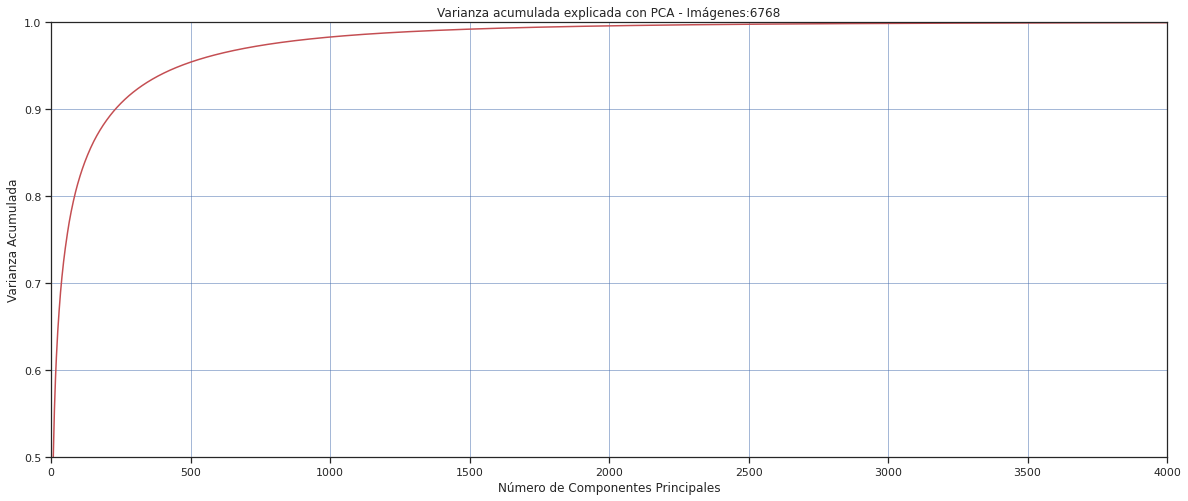

In [114]:
# Extract the pca object
pca = pipeline.named_steps['pca']

# Plot the cumulative variance explained

plt.figure(figsize = (20, 8))
plt.plot(list(range(X_train_pca.shape[1])), np.cumsum(pca.explained_variance_ratio_), 'r-')
plt.xlabel('Número de Componentes Principales'); plt.ylabel('Varianza Acumulada');
plt.title('Varianza acumulada explicada con PCA - Imágenes:'+str(X_train_pca.shape[1]));
plt.ylim(0.5, 1)
plt.xlim(0, 4000)
plt.savefig(fname=BASE_DIR_GRA +"/Varianza_acumulada_PCA "+fecha_hora()+".png")
plt.grid(color='b', linestyle='-', linewidth=0.5)

In [102]:
print('500 principal components account for {:.4f}% of the variance.'.format(100 * np.sum(pca.explained_variance_ratio_[:500])))

500 principal components account for 95.4207% of the variance.


Solo necesitamos unos pocos componentes principales para dar cuenta de la mayor parte de la varianza en los datos. Podemos utilizar los dos primeros componentes principales para visualizar el conjunto de datos completo. Colorearemos los puntos de datos por el valor del objetivo para ver si el uso de dos componentes principales separa claramente las clases.

In [116]:
#muestra_ytrain = int(y_train.shape[0]*0.75)
muestra_ytrain = int(y_train.shape[0])

y_train_new2 = y_train[:muestra_ytrain]
X_train_pca.shape, y_train.shape,X_test_pca.shape, X_train_pca[:,0].shape, X_train_pca[:,1].shape, y_train_new2.shape

((6768, 6768), (6768,), (753, 6768), (6768,), (6768,), (6768,))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


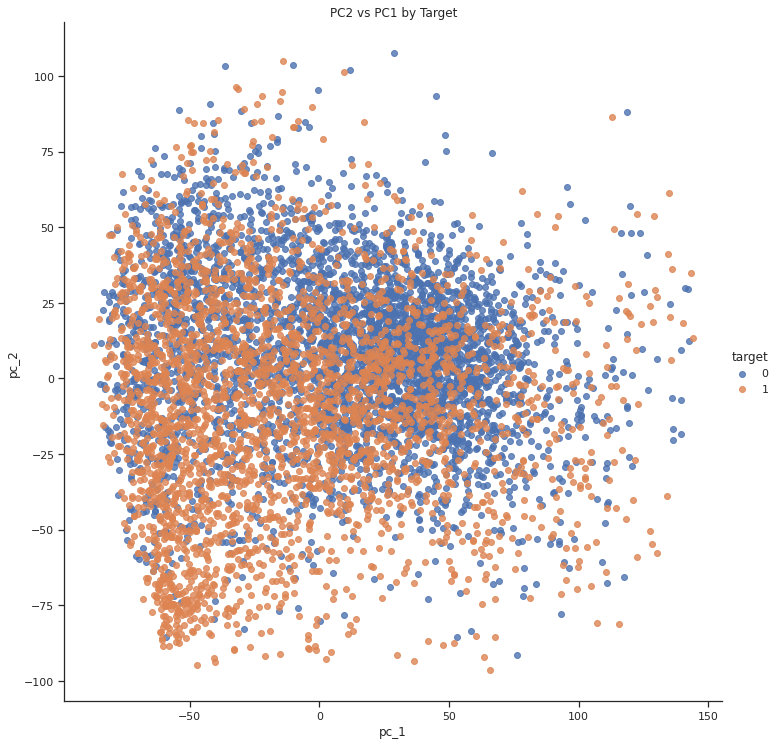

In [118]:
# Dataframe of pca results
pca_df = pd.DataFrame({'pc_1': X_train_pca[:, 0], 'pc_2': X_train_pca[:, 1], 'target': y_train_new2})

# Plot pc2 vs pc1 colored by target
sns.lmplot('pc_1', 'pc_2', data = pca_df, hue = 'target', fit_reg=False, size = 10)
plt.title('PC2 vs PC1 by Target')
plt.savefig(fname=BASE_DIR_GRA +"/PC2 vs PC1 by Target "+fecha_hora()+".png")

#### Calcular PCA sin Escalar

In [65]:
#############################################################################
# Calcular un PCA en un conjunto de datos Clasificación de Residuos con data etiquetada
from time import time
n_components = 500

print("Extracción de los %0.2f principales desde %d residuos"
      % (n_components, X_train_new_rx.shape[0]))
t0 = time()
#pca = PCA(n_components=n_components).fit(X_train_new) # usarse cuando es por porcentaje de la varianza
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train_new_rx)
print("done in %0.3fs" % (time() - t0))

print("Proyectar los datos de entrada sobre la base ortonormal de residuos")
t0 = time()
X_train_pca = pca.transform(X_train_new_rx)
X_test_pca = pca.transform(X_test_new_rx)
print("done in %0.3fs" % (time() - t0))


Extracción de los 500.00 principales desde 6768 residuos
done in 47.484s
Proyectar los datos de entrada sobre la base ortonormal de residuos
done in 2.815s


In [68]:
X_train_pca.shape, X_test_pca.shape

((6768, 500), (753, 500))

### Calcular PCA Escalado

In [69]:
#############################################################################
# Calcular un PCA en un conjunto de datos Clasificación de Residuos con data etiquetada
from time import time
n_components = 500

print("Extracción de los %0.2f principales desde %d residuos"
      % (n_components, X_train_scaled_rx.shape[0]))
t0 = time()
#pca = PCA(n_components=n_components).fit(X_train_new) # Usarse cuando es por porcentaje de la varianza
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train_scaled_rx)
print("done in %0.3fs" % (time() - t0))

print("Proyectar los datos de entrada sobre la base ortonormal de residuos")
t0 = time()
X_train_pca_scaled = pca.transform(X_train_scaled_rx)
X_test_pca_scaled = pca.transform(X_test_scaled_rx)
print("done in %0.3fs" % (time() - t0))


Extracción de los 500.00 principales desde 6768 residuos
done in 46.718s
Proyectar los datos de entrada sobre la base ortonormal de residuos
done in 2.899s


In [70]:
X_train_pca_scaled.shape, X_test_pca_scaled.shape

((6768, 500), (753, 500))

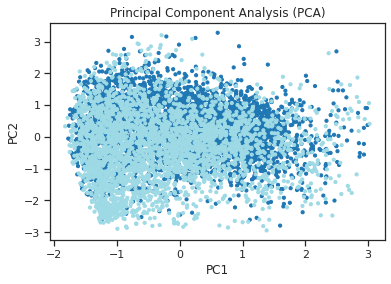

In [71]:
# REDUCE DIMENSIONS WITH PRINCIPAL COMPONENT ANALYSIS (PCA)

plt.scatter(X_train_pca_scaled[:, 0], X_train_pca_scaled[:, 1], c = y_train, cmap = 'tab20', s = 10)
plt.title('Principal Component Analysis (PCA)')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig(fname=BASE_DIR_GRA +"/Principal Component Analysis (PCA) "+fecha_hora()+".png") 

## Autoencoders

Text(0, 0.5, 'PC2')

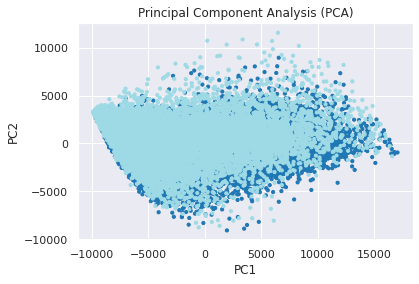

In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from keras.optimizers import Adam
from sklearn.decomposition import PCA
from keras.models import Sequential, Model


# REDUCE DIMENSIONS WITH PRINCIPAL COMPONENT ANALYSIS (PCA)
n_input = 500

x_train_auto = PCA(n_components = n_input).fit_transform(X_train_new); y_train = y_train
plt.scatter(x_train_auto[:, 0], x_train_auto[:, 1], c = y_train, cmap = 'tab20', s = 10)
plt.title('Principal Component Analysis (PCA)')
plt.xlabel("PC1")
plt.ylabel("PC2")

Componentes no lineales, más poderoso que PCA

In [ ]:
x_train_auto.shape, X_train_pca.shape, X_test_pca.shape

((22564, 500), (22564, 500), (2513, 500))

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

Text(0, 0.5, 'Dimension 2')

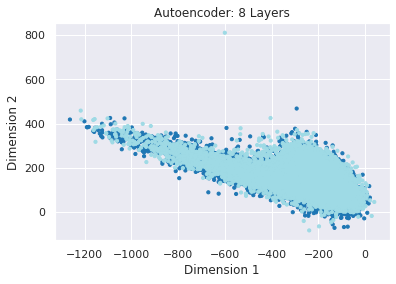

In [ ]:
# REDUCE DIMENSIONS WITH AUTOENCODER
model = Sequential()
model.add(Dense(100,       activation='elu', input_shape=(n_input,)))
model.add(Dense(50,       activation='elu'))
model.add(Dense(20,       activation='elu'))
model.add(Dense(n_input,        activation='linear', name="bottleneck"))
model.add(Dense(20,       activation='elu'))
model.add(Dense(50,       activation='elu'))
model.add(Dense(100,       activation='elu'))
model.add(Dense(n_input,  activation='sigmoid'))
model.compile(loss = 'mean_squared_error', optimizer = Adam())
model.fit(x_train_auto, x_train_auto, batch_size = 8, epochs = 100, verbose = 3)
encoder = Model(model.input, model.get_layer('bottleneck').output)
bottleneck_representation = encoder.predict(x_train_auto)
bottleneck_representation_test = encoder.predict(X_test_pca)

#Gráfica
plt.scatter(bottleneck_representation[:,0], bottleneck_representation[:,1], 
            c = y_train, s = 10, cmap = 'tab20')
plt.title('Autoencoder: 8 Layers')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

In [ ]:
bottleneck_representation.shape, bottleneck_representation_test.shape

((22564, 500), (2513, 500))

## TSNE

Es la evaluación de PCA, en algunas partes.

In [ ]:
from sklearn.manifold import TSNE
import sklearn.manifold
from time import time
# Time the tSNE computation
t0 = time()

# Find the optimal low-dimensional representation with t-SNE
tsne_rna = sklearn.manifold.TSNE(n_components=3, init='pca', random_state=0,verbose=1)
embed_tsne = tsne_rna.fit_transform(X_train_pca)
embed_tsne_test = tsne_rna.fit_transform(X_test_pca)

# Store the time
t_tsne = time() - t0
# Print time
print('t-SNE took %.2fs.' % t_tsne)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 22564 samples in 1.899s...
[t-SNE] Computed neighbors for 22564 samples in 650.826s...
[t-SNE] Computed conditional probabilities for sample 1000 / 22564
[t-SNE] Computed conditional probabilities for sample 2000 / 22564
[t-SNE] Computed conditional probabilities for sample 3000 / 22564
[t-SNE] Computed conditional probabilities for sample 4000 / 22564
[t-SNE] Computed conditional probabilities for sample 5000 / 22564
[t-SNE] Computed conditional probabilities for sample 6000 / 22564
[t-SNE] Computed conditional probabilities for sample 7000 / 22564
[t-SNE] Computed conditional probabilities for sample 8000 / 22564
[t-SNE] Computed conditional probabilities for sample 9000 / 22564
[t-SNE] Computed conditional probabilities for sample 10000 / 22564
[t-SNE] Computed conditional probabilities for sample 11000 / 22564
[t-SNE] Computed conditional probabilities for sample 12000 / 22564
[t-SNE] Computed conditional probabilities for s

In [ ]:
embed_tsne.shape, embed_tsne_test.shape

NameError: ignored

In [ ]:
embed_tsne[0,:]

# **Metricas**

In [72]:
def metrics(algoritmo,Y_validation,predictions):
    print('Accuracy:', accuracy_score(Y_validation, predictions))
    print('F1 score:', f1_score(Y_validation, predictions,average='weighted'))
    print('Recall:', recall_score(Y_validation, predictions,average='weighted'))
    print('Precision:', precision_score(Y_validation, predictions, average='weighted'))
    print('\n clasification report:\n', classification_report(Y_validation, predictions))
    print('\n confusion matrix:\n',confusion_matrix(Y_validation, predictions))
    #Creamos la matriz de confusión
    cm = confusion_matrix(Y_validation, predictions)

    # Visualizamos la matriz de confusión
    df_cm = pd.DataFrame(cm, range(2), range(2))  
    plt.figure(figsize = (10,6))
    plt.title('Matrix de Confusión '+algoritmo)
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta predicta')  
    sn.set(font_scale=1.4) #for label size  
    sn.heatmap(df_cm, annot=True,fmt = 'd', annot_kws={"size": 12}) # font size
    plt.savefig(fname=BASE_DIR_GRA +"/Matrix_Confusion"+algoritmo+" "+fecha_hora()+".png")  
    plt.show()  

# **Algoritmos de Machine Learning**

In [73]:
#Variable para determinar el modelo analizar

#PCA escalado
#XTRAIN = X_train_pca_scaled
#XTEST = X_test_pca_scaled

#AUTOENCODERS con PCA escalado
XTRAIN = X_train_pca_scaled
XTEST = X_test_pca_scaled

## 1.KNN - K-Nearest Neighbors

In [127]:
#KNN Grid Search

#Variable para determinar el modelo analizar
#XTRAIN = X_train_pca_scaled
#XTEST = X_test_pca_scaled

KNN = KNeighborsClassifier()

neighbors_setting = range(1,11)

print("Modelo con KNN:")
t0 = time()

#grid_values = {'n_neighbors':np.linspace(1,10,5).astype('int')}
grid_values = {'n_neighbors':neighbors_setting}
grid_KNN_acc = GridSearchCV(KNN, param_grid = grid_values, scoring = 'accuracy', verbose=200,n_jobs=-1)

#Validación
KNN_history_PCA = grid_KNN_acc.fit(XTRAIN, y_train)

#Validación caracteristicas importantes
#KNN_history_LGB = grid_KNN_acc.fit(X_train_small, y_train)
#KNN_history_test_LGB = grid_KNN_acc.fit(X_test_small, y_test)
print("done in %0.3fs" % (time() - t0))
#------------------------Imprimir resultados
#PCA
print("Resultados train:", KNN_history_PCA.best_params_,KNN_history_PCA.best_score_)
#LGB
#print("Resultados LGB:", KNN_history_LGB.best_params_,KNN_history_LGB.best_score_)



Modelo con KNN:
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  14 tasks    

In [128]:
grid_mean_scores = np.array(KNN_history_PCA.cv_results_['mean_test_score'])
print(grid_mean_scores)

#grid_mean_scores_lgb = np.array(KNN_history_LGB.cv_results_['mean_test_score'])
#grid_test_mean_scores_lgb = np.array(KNN_history_test_LGB.cv_results_['mean_test_score'])


[0.45981087 0.47089243 0.44858156 0.45375296 0.44606974 0.44739953
 0.44414894 0.44976359 0.44414894 0.44680851]


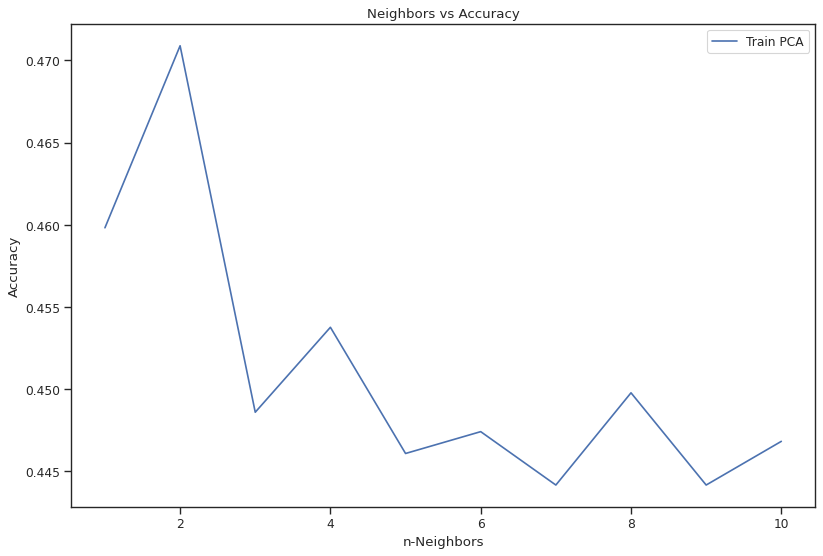

The best score with data validation with PCA: 47.0892% with Neighbors:  2


In [129]:
plt.figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(neighbors_setting,grid_mean_scores,label='Train PCA')
#plt.plot(neighbors_setting,grid_test_mean_scores,label='Test PCA')
#plt.plot(neighbors_setting,grid_mean_scores_lgb,label='Train LGB')
#plt.plot(neighbors_setting,grid_test_mean_scores_lgb,label='Test LGB')


plt.xlabel('n-Neighbors')
plt.ylabel('Accuracy')
plt.title('Neighbors vs Accuracy')
plt.legend()
plt.savefig(fname=BASE_DIR_GRA +"/KNN-Algorithm "+fecha_hora()+".png", dpi=100) 
plt.show()  
print('The best score with data validation with PCA: {:.4f}%'.format(100*KNN_history_PCA.best_score_),'with Neighbors: ',KNN_history_PCA.best_params_.get('n_neighbors'))
#print('The best score with data validation with LGB: {:.4f}%'.format(100*KNN_history_LGB.best_score_),'with Neighbors: ',KNN_history_LGB.best_params_.get('n_neighbors'))


In [132]:
# Predecir valores basados en nuevos parámetros
predictions_KNN = KNN_history_PCA.predict(XTEST)

In [133]:
#Se realizan las predicciones con los valores de test con PCA
print("Valores de predicción:",predictions_KNN)

Valores de predicción: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1
 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1

In [134]:
#Revisar donde se equivoco en las predicciones 
predictions_KNN==y_test

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True,  True,  True, False,  True, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False,  True, False, False,  True, False, False,  True, False,
       False, False, False, False,  True,  True, False,  True,  True,
       False, False, False, False,  True, False, False,  True, False,
       False, False,

{'n_neighbors': 2} Score:  0.4708924349881796
Accuracy: 0.4940239043824701
F1 score: 0.42698262144814914
Recall: 0.4940239043824701
Precision: 0.5814544298179849

 clasification report:
               precision    recall  f1-score   support

           0       0.68      0.18      0.28       420
           1       0.46      0.89      0.61       333

    accuracy                           0.49       753
   macro avg       0.57      0.54      0.45       753
weighted avg       0.58      0.49      0.43       753


 confusion matrix:
 [[ 75 345]
 [ 36 297]]


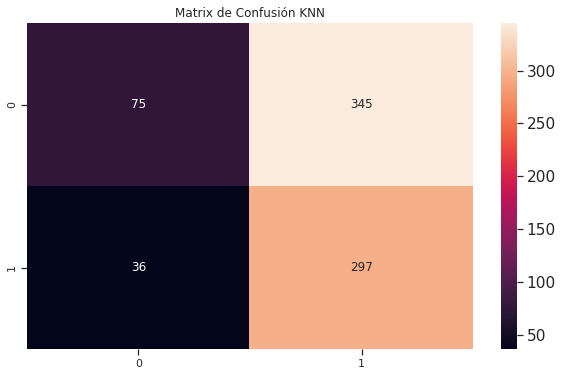

In [135]:
#Imprimir métricas
print(grid_KNN_acc.best_params_,"Score: ", grid_KNN_acc.best_score_)
metrics("KNN",y_test,predictions_KNN)


In [167]:
type(neighbors_setting)

range

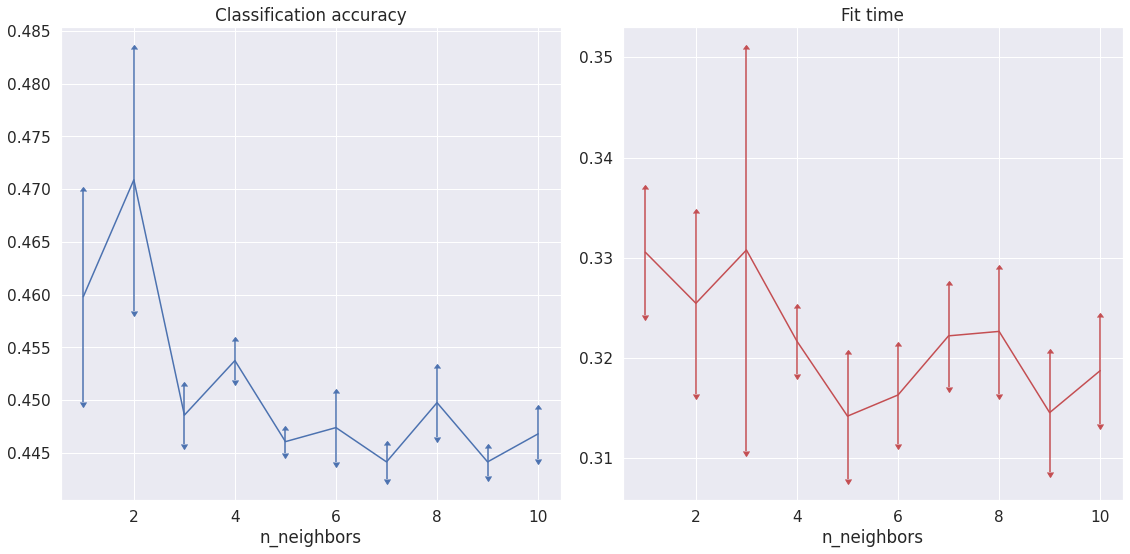

In [137]:
# Plot the results of the grid search.
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].errorbar(x=neighbors_setting,
                 y=KNN_history_PCA.cv_results_['mean_test_score'],
                 yerr=KNN_history_PCA.cv_results_['std_test_score'],uplims=True, lolims=True)
axes[0].set(xlabel='n_neighbors', title='Classification accuracy')
axes[1].errorbar(x=neighbors_setting,
                 y=KNN_history_PCA.cv_results_['mean_fit_time'],
                 yerr=KNN_history_PCA.cv_results_['std_fit_time'],color='r',uplims=True, lolims=True)
axes[1].set(xlabel='n_neighbors', title='Fit time')
fig.tight_layout()
plt.savefig(fname=BASE_DIR_GRA +"/Clasificación_AccuracyKNN "+fecha_hora()+".png")  
plt.show()

In [139]:
KNN_history_PCA.cv_results_

{'mean_fit_time': array([0.33054996, 0.32546314, 0.33077526, 0.32167665, 0.31420557,
        0.31631724, 0.32221293, 0.32265695, 0.3145558 , 0.31874235]),
 'mean_score_time': array([14.21147195, 14.24705799, 14.11495153, 14.24165297, 14.15296642,
        14.18206795, 14.25665673, 14.1927592 , 14.17202528, 14.22790281]),
 'mean_test_score': array([0.45981087, 0.47089243, 0.44858156, 0.45375296, 0.44606974,
        0.44739953, 0.44414894, 0.44976359, 0.44414894, 0.44680851]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors': 7},
  {'n_neighbors': 8},
  {'n_neighbors': 9},
  {'n_neighbors': 10}],
 'rank_test_score': array([ 2,  1,  5,  3,  8,  6, 10

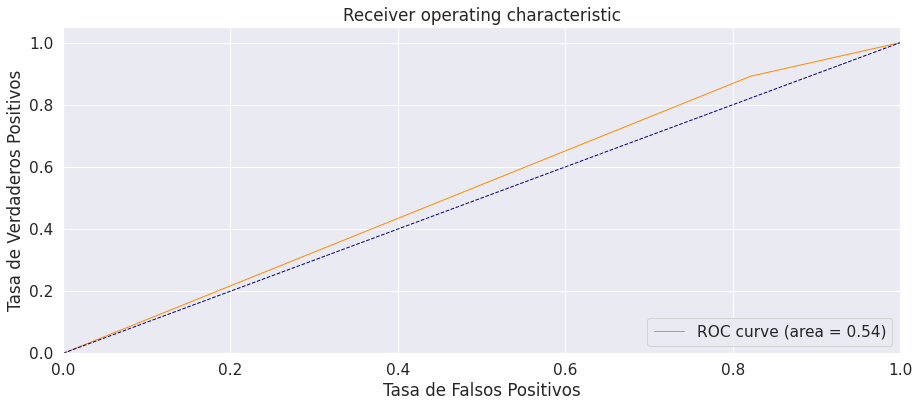

In [141]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predictions_KNN)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15, 6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig(fname=BASE_DIR_GRA +"/ROC_KNN "+fecha_hora()+".png")  
plt.show()

## 2.Logistic Regression

In [151]:
#Grid Search
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import GridSearchCV

#Variable para determinar el modelo analizar
#XTRAIN = X_train_pca
#XTEST = X_test_pca

print("Modelo con LR:")
t0 = time()

# Se ingresan el algoritmo Logistic Regression de entrenamiento para que aprende
LR= LogisticRegression(solver='liblinear', multi_class='ovr')

grid_values = {'penalty': ['l1', 'l2','elasticnet'],'C':[0.001,0.01,0.1,1,10]}
grid_LR_acc = GridSearchCV(LR, param_grid = grid_values, scoring = 'accuracy', verbose=2, n_jobs=-1)
LR_history = grid_LR_acc.fit(XTRAIN, y_train)

#Predict values based on new parameters
predictions_LR = grid_LR_acc.predict(XTEST)

print("done in %0.3fs" % (time() - t0))
#------------------------Imprimir resultados
print("Resultados:", grid_LR_acc.best_params_,grid_LR_acc.best_score_)



Modelo con LR:
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.8s finished


done in 9.134s
Resultados: {'C': 0.01, 'penalty': 'l1'} 0.745273537333198


In [152]:
#Se realizan las predicciones con los valores de test con PCA
print("Valores de predicción:",predictions_LR)

Valores de predicción: [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1
 0

In [153]:
#Revisar donde se equivoco en las predicciones 
predictions_LR==y_test

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

{'C': 0.01, 'penalty': 'l1'} Score:  0.745273537333198
Accuracy: 0.8300132802124834
F1 score: 0.8271309118966785
Recall: 0.8300132802124834
Precision: 0.8362152742553693

 clasification report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86       420
           1       0.88      0.71      0.79       333

    accuracy                           0.83       753
   macro avg       0.84      0.82      0.82       753
weighted avg       0.84      0.83      0.83       753


 confusion matrix:
 [[387  33]
 [ 95 238]]


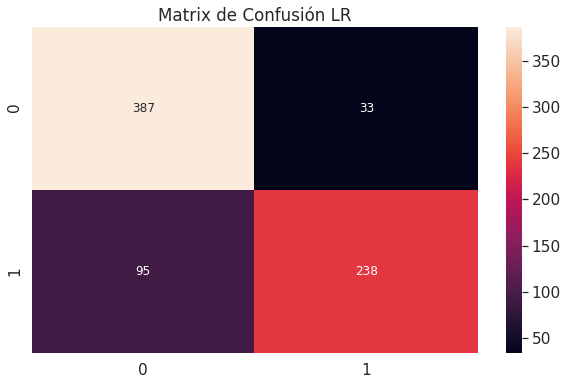

In [154]:
#Imprimir métricas
print(LR_history.best_params_,"Score: ", LR_history.best_score_)
metrics("LR",y_test,predictions_LR)

In [158]:
grid_mean_scores = np.array(LR_history.cv_results_['mean_test_score'])
print(grid_mean_scores)

[0.55688535 0.71025392        nan 0.74527354 0.70921984        nan
 0.73020084 0.70862845        nan 0.71054913 0.70907191        nan
 0.70877649 0.70907191        nan]


In [177]:
LR_setting= range(1,5)
LR_setting

range(1, 5)

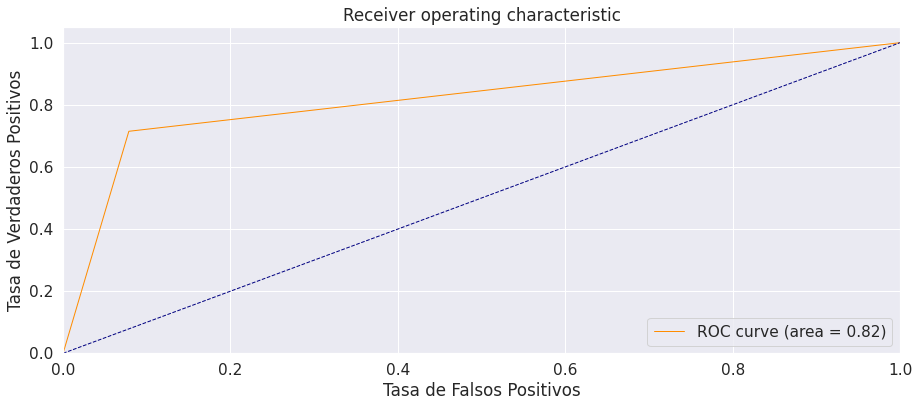

In [181]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predictions_LR)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15,6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig(fname=BASE_DIR_GRA +"/ROC_LR "+fecha_hora()+".png")  
plt.show()

##3.Decision Tree

In [183]:
#Grid Search
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import GridSearchCV

#Variable para determinar el modelo analizar
#XTRAIN = X_train_pca
#XTEST = X_test_pca

DT = DecisionTreeClassifier()

t0 = time()
grid_values = {"criterion":['gini','entropy'],"max_depth":range(1,5),"min_samples_split":range(1,5),"min_samples_leaf":range(1,5)}
grid_DT_acc = GridSearchCV(DT, param_grid = grid_values, verbose=1,n_jobs=-1)
DT_history = grid_DT_acc.fit(XTRAIN, y_train)
print("done in %0.3fs" % (time() - t0))

#------------------------Imprimir resultados
print("Resultados:", DT_history.best_params_,DT_history.best_score_)



Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 494 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  6.5min finished


done in 389.770s
Resultados: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.7037540079979825


In [184]:
#Predict values based on new parameters
predictions_DT = grid_DT_acc.predict(XTEST)

print(grid_DT_acc.best_params_,grid_DT_acc.best_score_)


{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.7037540079979825


In [186]:
#Se realizan las predicciones con los valores de test con PCA
print("Valores de predicción:",predictions_DT)

Valores de predicción: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1
 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0
 0

In [187]:
#Revisar donde se equivoco en las predicciones 
predictions_DT==y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2} Score:  0.7037540079979825
Accuracy: 0.7450199203187251
F1 score: 0.7351732303645581
Recall: 0.7450199203187251
Precision: 0.7582301737256264

 clasification report:
               precision    recall  f1-score   support

           0       0.72      0.90      0.80       420
           1       0.81      0.55      0.66       333

    accuracy                           0.75       753
   macro avg       0.76      0.73      0.73       753
weighted avg       0.76      0.75      0.74       753


 confusion matrix:
 [[377  43]
 [149 184]]


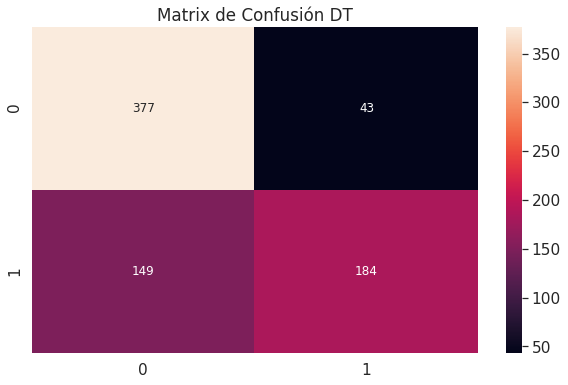

In [188]:
#Imprimir métricas
print(grid_DT_acc.best_params_,"Score: ", grid_DT_acc.best_score_)
metrics("DT",y_test,predictions_DT)

In [189]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predictions_DT)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15, 6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig(fname=BASE_DIR_GRA +"/ROC_DT "+fecha_hora()+".png")  
plt.show()

##4.Random Forest

In [74]:
#Grid Search 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import GridSearchCV

#Variable para determinar el modelo analizar
#XTRAIN = X_train_pca
#XTEST = X_test_pca

# Create a based model
RF = RandomForestClassifier(random_state = 1, min_samples_split = 5,  min_samples_leaf = 1, n_jobs=-1) 

t0 = time()
grid_values = [ {'n_estimators': [10,50,100,200], 'max_features': ['auto', 'sqrt', 'log2'],  'max_depth': [5, 10]}]
grid_RF_acc = GridSearchCV(RF, param_grid = grid_values, verbose=1, scoring="accuracy", n_jobs= -1)
RF_history = grid_RF_acc.fit(XTRAIN, y_train)
#RF_history_test = grid_RF_acc.fit(XTEST, y_test)
print("done in %0.3fs" % (time() - t0))

predictions_RF = grid_RF_acc.predict(XTEST)

#------------------------Imprimir resultados
print("Resultados:", grid_RF_acc.best_params_,grid_RF_acc.best_score_)
#print("Resultados test:", RF_history_test.best_params_,RF_history_test.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  3.7min finished


done in 240.833s
Resultados: {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200} 0.6972517730496454


In [75]:
grid_values

[{'max_depth': [5, 10],
  'max_features': ['auto', 'sqrt', 'log2'],
  'n_estimators': [10, 50, 100, 200]}]

In [76]:
#Se realizan las predicciones con los valores de test con PCA
print("Valores de predicción:",predictions_RF)

Valores de predicción: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1
 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1
 0

In [77]:
#Revisar donde se equivoco en las predicciones 
predictions_RF==y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200} Score:  0.6972517730496454
Accuracy: 0.7450199203187251
F1 score: 0.7293000729293582
Recall: 0.7450199203187251
Precision: 0.7750861837623597

 clasification report:
               precision    recall  f1-score   support

           0       0.70      0.94      0.80       420
           1       0.87      0.50      0.63       333

    accuracy                           0.75       753
   macro avg       0.78      0.72      0.72       753
weighted avg       0.78      0.75      0.73       753


 confusion matrix:
 [[394  26]
 [166 167]]


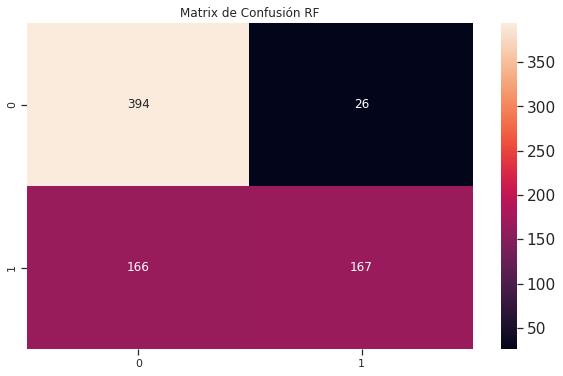

In [78]:
#Imprimir métricas
print(RF_history.best_params_,"Score: ", RF_history.best_score_)
metrics("RF",y_test,predictions_RF)

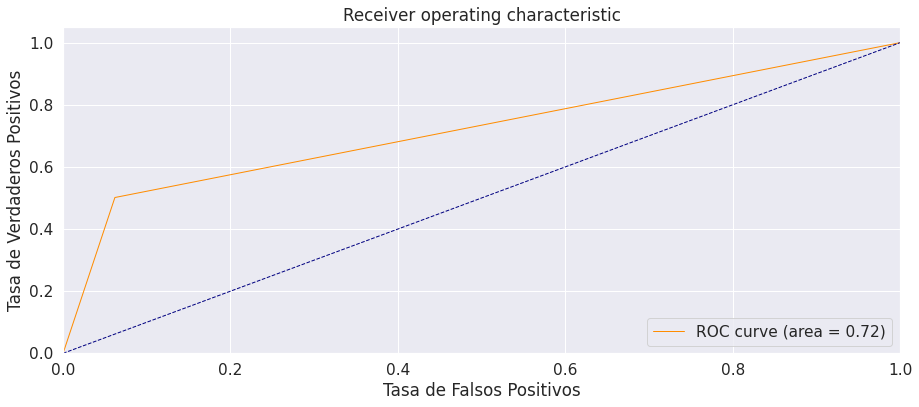

In [79]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predictions_RF)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15,6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig(fname=BASE_DIR_GRA +"/ROC_RF "+fecha_hora()+".png")  
plt.show()

##5.SVM - Support Vector Machine

In [ ]:
#Librerias
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from time import time
from sklearn import svm
from time import time


In [80]:
# #############################################################################
# Train a SVM classification model - Gridseach

#Variable para determinar el modelo analizar
#XTRAIN = X_train_pca
#XTEST = X_test_pca

print("Fitting the classifier to the training set")
t0 = time()
#param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],'kernel': [ 'rbf'] } #  [ 'rbf' , 'poly' , 'sigmoid' , 'linear' ]
#param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1],'kernel': [ 'rbf'],'class_weight':['balanced']}
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': ['scale'],'kernel': [ 'rbf'], 'class_weight':['balanced']} 
grid_SVM_acc = GridSearchCV(SVC(), param_grid, cv=2, refit=True,scoring="accuracy", verbose=1, n_jobs=-1)
SVM_history = grid_SVM_acc.fit(XTRAIN, y_train)
#SVM_history_test = grid_SVM_acc.fit(XTRAIN, y_train)
print("done in %0.3fs" % (time() - t0))


predictions_SVM = SVM_history.predict(XTEST)

#------------------------Imprimir resultados
print("Resultados:", grid_SVM_acc.best_params_,grid_SVM_acc.best_score_)


Fitting the classifier to the training set
Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.4min finished


done in 121.983s
Resultados: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'} 0.7055260047281324


Mejor estimador encontrado por grid search:
SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Mejor Score encontrado por grid search:
Score:  0.7055260047281324
Mejor parametros encontrado por grid search:
Parametros:  {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
-------------- METRICAS ------------------
Accuracy: 0.7848605577689243
F1 score: 0.7815466828034245
Recall: 0.7848605577689243
Precision: 0.7880212584428358

 clasification report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       420
           1       0.81      0.67      0.73       333

    accuracy                           0.78       753
   macro avg       0.79      0.77      0.78       753
weighted avg       0.79      0.78      0.78       

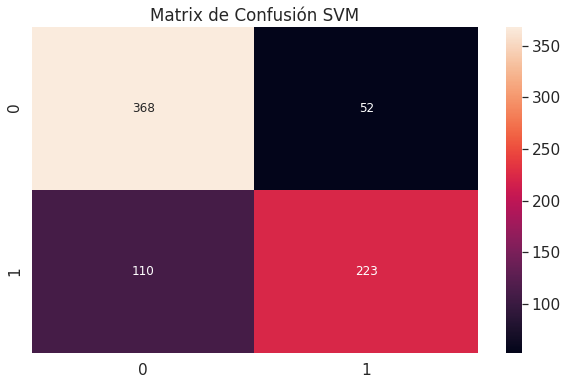

In [81]:
#Imprimir métricas
print("Mejor estimador encontrado por grid search:")
print(SVM_history.best_estimator_)
print("Mejor Score encontrado por grid search:")
print("Score: ", SVM_history.best_score_)
print("Mejor parametros encontrado por grid search:")
print("Parametros: ", SVM_history.best_params_)

print("-------------- METRICAS ------------------")
metrics("SVM",y_test,predictions_SVM)

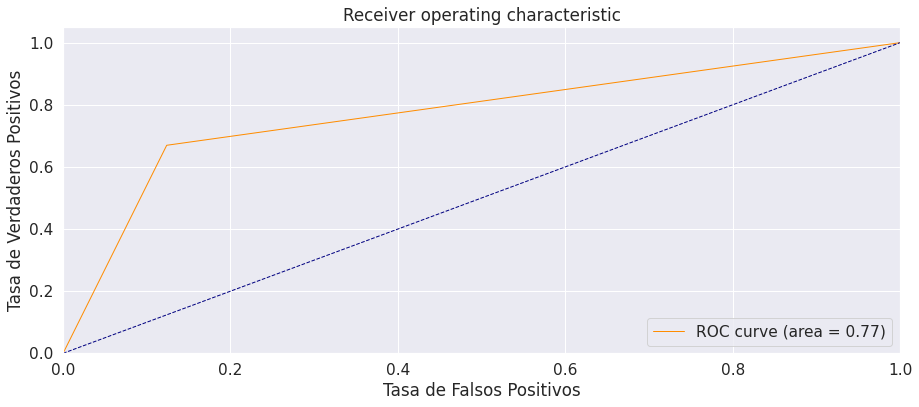

In [82]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predictions_SVM)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15, 6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig(fname=BASE_DIR_GRA +"/ROC_SVM "+fecha_hora()+".png")  
plt.show()

In [83]:
# Calcular la matriz de confusión y utilizarla para derivar la precisión, sensibilidad y especificidad
cm = confusion_matrix(y_test, predictions_SVM)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# Mostrar la matriz de confusión, precisión, sensibilidad y especificidad
print(cm)
print("accuracy: {:.3f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[368  52]
 [110 223]]
accuracy: 0.785
sensitivity: 0.8762
specificity: 0.6697


## 6.LDA

In [84]:
#Grid Search 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import GridSearchCV

#Variable para determinar el modelo analizar
XTRAIN = X_train_pca
XTEST = X_test_pca

# Linear Discriminant Analysis - Ajuste de Parámetros
LDA = LinearDiscriminantAnalysis()

print("Modelo con LDA:")
t0 = time()

grid_values = {"solver" : ['svd', 'lsqr', 'eigen'],
              "tol" : [0.0001,0.0002,0.0003]}
grid_LDA_acc = GridSearchCV(LDA, param_grid = grid_values, scoring = 'accuracy', verbose=1, n_jobs=-1)
LDA_history = grid_LDA_acc.fit(XTRAIN, y_train)

print("done in %0.3fs" % (time() - t0))

#Predict values based on new parameters
predictions_LDA = grid_LDA_acc.predict(XTEST)

#------------------------Imprimir resultados
print("Resultados:", LDA_history.best_params_,LDA_history.best_score_)

Modelo con LDA:
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:   22.9s finished


done in 24.362s
Resultados: {'solver': 'svd', 'tol': 0.0001} 0.7133569364430048


{'solver': 'svd', 'tol': 0.0001} Score:  0.7133569364430048
Accuracy: 0.7782204515272244
F1 score: 0.7745473504483272
Recall: 0.7782204515272244
Precision: 0.7816352603527433

 clasification report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       420
           1       0.81      0.66      0.72       333

    accuracy                           0.78       753
   macro avg       0.78      0.77      0.77       753
weighted avg       0.78      0.78      0.77       753


 confusion matrix:
 [[367  53]
 [114 219]]


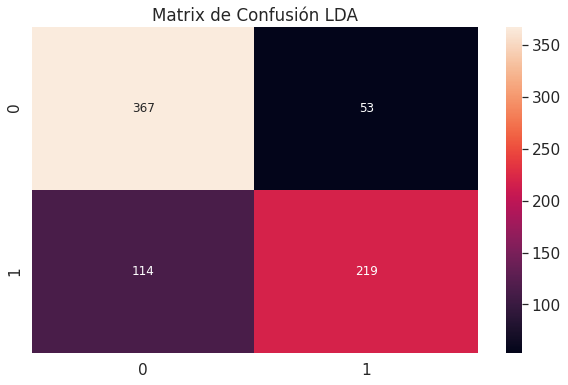

In [86]:
#Imprimir métricas
print(LDA_history.best_params_,"Score: ", LDA_history.best_score_)
metrics("LDA",y_test,predictions_LDA)

## Validación Cruzada

In [88]:
#Variable para determinar el modelo analizar
#XTRAIN = X_train_pca
#XTEST = X_test_pca

seed = 42
scoring = 'accuracy'
t0 = time()

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    t1 = time()
    #segmentar la base de datos de entrenamiento en 5 partes
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    #probar los grupos en cada modelp
    cv_results = model_selection.cross_val_score(model, XTRAIN, y_train, cv=kfold, scoring=scoring)
    #almacena resultados
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print("done Algoritmo in %0.3fs" % (time() - t1))

print("done in %0.3fs" % (time() - t0))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.599412 (0.079080)
done Algoritmo in 0.392s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LDA: 0.590692 (0.086136)
done Algoritmo in 4.643s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.434555 (0.444826)
done Algoritmo in 51.495s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.564951 (0.169408)
done Algoritmo in 140.926s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.497394 (0.261404)
done Algoritmo in 64.616s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


DT: 0.559228 (0.064050)
done Algoritmo in 28.401s
done in 290.474s


También podemos crear un gráfico de los resultados de la evaluación del modelo y comparar la dispersión y la precisión media de cada modelo. Hay una población de medidas de precisión para cada algoritmo porque cada algoritmo se evaluó 5veces (validación cruzada 5 veces).


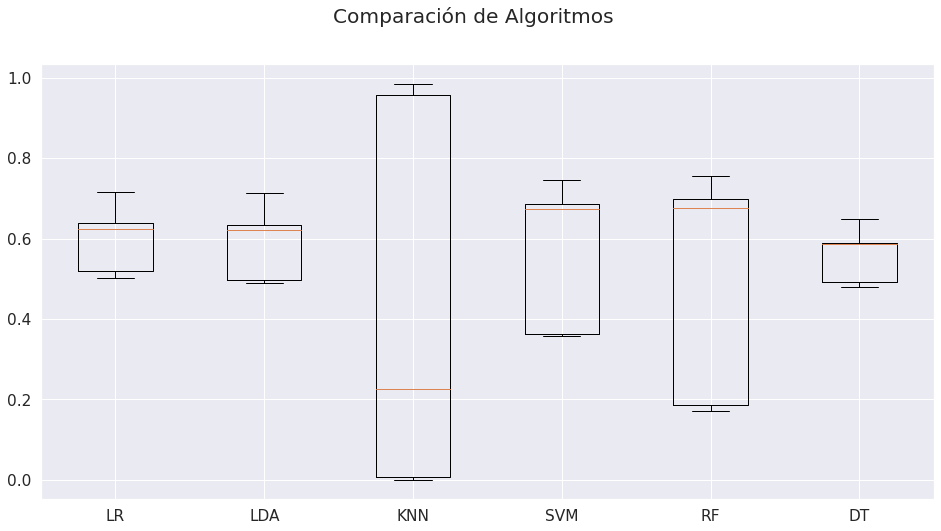

In [90]:
# Compare Algorithms Accuracy
fig = plt.figure(figsize=(16,8))
fig.suptitle('Comparación de Algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig(fname=BASE_DIR_GRA +"/Validación Cruzada"+fecha_hora()+".png") 
plt.show()

# **Deep Learning**

## Multilayer Perceptron o Fully connected

In [ ]:
#Baseline Model with Multi-Layer Perceptrons

# flatten 64*64*3 images to a 12288 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2] * X_train.shape[3]
X_train_new = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test_new = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')


# normalize inputs from 0-255 to 0-1
X_train_normalize = X_train_new / 255
X_test_normalize = X_test_new / 255

In [ ]:
#############################################################################
# Calcular un PCA en un conjunto de datos Clasificación de Residuos con data etiquetada
from time import time
n_components = 0.95

print("Extracción del  %0.2f de los componentes principales desde %d residuos"
      % (n_components, X_train_new.shape[0]))
t0 = time()
pca = PCA(n_components=n_components).fit(X_train_new)
print("done in %0.3fs" % (time() - t0))

print("Proyectar los datos de entrada sobre la base ortonormal de residuos")
t0 = time()
X_train_pca = pca.transform(X_train_new)
X_test_pca = pca.transform(X_test_new)
print("done in %0.3fs" % (time() - t0))


Extracción del  0.95 de los componentes principales desde 4512 residuos
done in 207.538s
Proyectar los datos de entrada sobre la base ortonormal de residuos
done in 7.653s


In [ ]:
print('X_PCA:',X_train_pca.shape)

X_PCA: (4512, 984)


In [95]:
encoder = LabelEncoder()
encoder.fit(y_test)
encoded_YTrain = encoder.transform(y_train)
encoded_YValidation = encoder.transform(y_test)
encode_XTrain=X_train_pca_scaled
encode_Xvalidation=X_test_pca_scaled

# convert integers to dummy variables (i.e. one hot encoded)
categorical_YTrain = np_utils.to_categorical(encoded_YTrain)
categorical_YValidation = np_utils.to_categorical(encoded_YValidation)
num_classes = categorical_YValidation.shape[1]



# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=encode_XTrain.shape[1], activation='relu'))
    model.add(Dense(64, kernel_initializer='normal', activation='relu'))
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model


# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# summarize layers
print(create_model().summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                16032     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 26,722
Trainable params: 26,722
Non-trainable params: 0
_________________________________________________________________
None


In [96]:
# How to Tune Batch Size and Number of Epochs

model = KerasClassifier(build_fn=create_model, verbose=1)
# define the grid search parameters
batch_size = [16,32] # [10, 20,30, 40,50, 60,70, 80,90, 100]
epochs = [10] #[10, 50, 100, 200]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid,verbose=2)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] batch_size=16, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train on 5414 samples
Epoch 1/10
5414/5414 [==============================] - 1s 145us/sample - loss: 0.6912 - accuracy: 0.5477
Epoch 2/10
5414/5414 [==============================] - 1s 93us/sample - loss: 0.6880 - accuracy: 0.5541
Epoch 3/10
5414/5414 [==============================] - 0s 81us/sample - loss: 0.6863 - accuracy: 0.5543
Epoch 4/10
5414/5414 [==============================] - 0s 82us/sample - loss: 0.6845 - accuracy: 0.5550
Epoch 5/10
5414/5414 [==============================] - 0s 72us/sample - loss: 0.6824 - accuracy: 0.5587
Epoch 6/10
5414/5414 [==============================] - 0s 80us/sample - loss: 0.6797 - accuracy: 0.5711
Epoch 7/10
5414/5414 [==============================] - 0s 73us/sample - loss: 0.6763 - accuracy: 0.5768
Epoch 8/10
5414/5414 [==============================] - 0s 77us/sample - loss: 0.6713 - accuracy: 0.5992
Epoch 9/10
5414/5414 [==============================] - 0s 79us/sample - loss: 0.6637 - accuracy: 0.6121
Epoch 10/10
5414/5414 [=========

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s


Train on 5414 samples
Epoch 1/10
5414/5414 [==============================] - 0s 91us/sample - loss: 0.6909 - accuracy: 0.5526
Epoch 2/10
5414/5414 [==============================] - 0s 84us/sample - loss: 0.6873 - accuracy: 0.5567
Epoch 3/10
5414/5414 [==============================] - 0s 71us/sample - loss: 0.6846 - accuracy: 0.5563
Epoch 4/10
5414/5414 [==============================] - 0s 71us/sample - loss: 0.6816 - accuracy: 0.5632
Epoch 5/10
5414/5414 [==============================] - 0s 78us/sample - loss: 0.6775 - accuracy: 0.5807
Epoch 6/10
5414/5414 [==============================] - 0s 82us/sample - loss: 0.6718 - accuracy: 0.6079
Epoch 7/10
5414/5414 [==============================] - 0s 81us/sample - loss: 0.6634 - accuracy: 0.6230
Epoch 8/10
5414/5414 [==============================] - 0s 74us/sample - loss: 0.6516 - accuracy: 0.6455
Epoch 9/10
5414/5414 [==============================] - 0s 78us/sample - loss: 0.6342 - accuracy: 0.6622
Epoch 10/10
5414/5414 [==========

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   42.4s finished


Train on 6768 samples
Epoch 1/10
6768/6768 [==============================] - 1s 103us/sample - loss: 0.6868 - accuracy: 0.5374
Epoch 2/10
6768/6768 [==============================] - 1s 87us/sample - loss: 0.6779 - accuracy: 0.5569
Epoch 3/10
6768/6768 [==============================] - 1s 85us/sample - loss: 0.6725 - accuracy: 0.5570
Epoch 4/10
6768/6768 [==============================] - 1s 86us/sample - loss: 0.6651 - accuracy: 0.5693
Epoch 5/10
6768/6768 [==============================] - 1s 87us/sample - loss: 0.6545 - accuracy: 0.5977
Epoch 6/10
6768/6768 [==============================] - 1s 92us/sample - loss: 0.6390 - accuracy: 0.6359
Epoch 7/10
6768/6768 [==============================] - 1s 93us/sample - loss: 0.6174 - accuracy: 0.6736
Epoch 8/10
6768/6768 [==============================] - 1s 93us/sample - loss: 0.5907 - accuracy: 0.7011
Epoch 9/10
6768/6768 [==============================] - 1s 95us/sample - loss: 0.5592 - accuracy: 0.7267
Epoch 10/10
6768/6768 [=========

In [97]:
# How to Tune the Training Optimization Algorithm

# Function to create model, required for KerasClassifier
def create_model(optimizer='sgd'):
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=encode_XTrain.shape[1], activation='relu'))
    model.add(Dense(64, kernel_initializer='normal', activation='relu'))
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=16, verbose=1)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Train on 5414 samples
Epoch 1/10
5414/5414 - 0s - loss: 0.6912 - accuracy: 0.5509
Epoch 2/10
5414/5414 - 0s - loss: 0.6879 - accuracy: 0.5552
Epoch 3/10
5414/5414 - 0s - loss: 0.6853 - accuracy: 0.5598
Epoch 4/10
5414/5414 - 0s - loss: 0.6824 - accuracy: 0.5663
Epoch 5/10
5414/5414 - 0s - loss: 0.6787 - accuracy: 0.5791
Epoch 6/10
5414/5414 - 0s - loss: 0.6737 - accuracy: 0.5980
Epoch 7/10
5414/5414 - 0s - loss: 0.6667 - accuracy: 0.6089
Epoch 8/10
5414/5414 - 0s - loss: 0.6565 - accuracy: 0.6280
Epoch 9/10
5414/5414 - 0s - loss: 0.6416 - accuracy: 0.6481
Epoch 10/10
5414/5414 - 0s - loss: 0.6212 - accuracy: 0.6735


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Train on 5414 samples
Epoch 1/10
5414/5414 - 0s - loss: 0.6903 - accuracy: 0.5546
Epoch 2/10
5414/5414 - 0s - loss: 0.6860 - accuracy: 0.5607
Epoch 3/10
5414/5414 - 0s - loss: 0.6819 - accuracy: 0.5714
Epoch 4/10
5414/5414 - 0s - loss: 0.6766 - accuracy: 0.5915
Epoch 5/10
5414/5414 - 0s - loss: 0.6687 - accuracy: 0.6150
Epoch 6/10
5414/5414 - 0s - loss: 0.6565 - accuracy: 0.6297
Epoch 7/10
5414/5414 - 0s - loss: 0.6372 - accuracy: 0.6528
Epoch 8/10
5414/5414 - 0s - loss: 0.6092 - accuracy: 0.6800
Epoch 9/10
5414/5414 - 0s - loss: 0.5721 - accuracy: 0.7153
Epoch 10/10
5414/5414 - 0s - loss: 0.5311 - accuracy: 0.7434
Train on 5414 samples
Epoch 1/10
5414/5414 - 0s - loss: 0.6933 - accuracy: 0.5117
Epoch 2/10
5414/5414 - 0s - loss: 0.6891 - accuracy: 0.5197
Epoch 3/10
5414/5414 - 0s - loss: 0.6851 - accuracy: 0.5631
Epoch 4/10
5414/5414 - 0s - loss: 0.6799 - accuracy: 0.5761
Epoch 5/10
5414/5414 - 0s - loss: 0.6727 - accuracy: 0.6099
Epoch 6/10
5414/5414 - 0s - loss: 0.6623 - accuracy: 0.

### Tuning Model FNN

In [98]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=encode_XTrain.shape[1], kernel_initializer='normal', activation='softsign'))
    model.add(Dense(256, kernel_initializer='normal', activation='softsign'))
    model.add(Dense(512, kernel_initializer='normal', activation='softsign'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid'))
    optimizer = 'adamax'
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=16, verbose=1)

kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

results = cross_val_score(estimator,encode_XTrain, categorical_YTrain, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Train on 5414 samples
Epoch 1/10
5414/5414 [==============================] - 2s 409us/sample - loss: 0.6396 - accuracy: 0.6287
Epoch 2/10
5414/5414 [==============================] - 2s 369us/sample - loss: 0.5190 - accuracy: 0.7447
Epoch 3/10
5414/5414 [==============================] - 2s 371us/sample - loss: 0.4679 - accuracy: 0.7857
Epoch 4/10
5414/5414 [==============================] - 2s 357us/sample - loss: 0.4338 - accuracy: 0.8059
Epoch 5/10
5414/5414 [==============================] - 2s 360us/sample - loss: 0.3986 - accuracy: 0.8254
Epoch 6/10
5414/5414 [==============================] - 2s 349us/sample - loss: 0.3549 - accuracy: 0.8545
Epoch 7/10
5414/5414 [==============================] - 2s 351us/sample - loss: 0.2950 - accuracy: 0.8905
Epoch 8/10
5414/5414 [==============================] - 2s 361us/sample - loss: 0.2265 - accuracy: 0.9255
Epoch 9/10
5414/5414 [==============================] - 2s 356us/sample - loss: 0.1626 - accuracy: 0.9469
Epoch 10/10
5414/5414 [=

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Train on 5414 samples
Epoch 1/10
5414/5414 [==============================] - 2s 401us/sample - loss: 0.6479 - accuracy: 0.6171
Epoch 2/10
5414/5414 [==============================] - 2s 360us/sample - loss: 0.5186 - accuracy: 0.7529
Epoch 3/10
5414/5414 [==============================] - 2s 367us/sample - loss: 0.4640 - accuracy: 0.7939
Epoch 4/10
5414/5414 [==============================] - 2s 358us/sample - loss: 0.4281 - accuracy: 0.8100
Epoch 5/10
5414/5414 [==============================] - 2s 364us/sample - loss: 0.3941 - accuracy: 0.8343
Epoch 6/10
5414/5414 [==============================] - 2s 358us/sample - loss: 0.3502 - accuracy: 0.8606
Epoch 7/10
5414/5414 [==============================] - 2s 361us/sample - loss: 0.3007 - accuracy: 0.8845
Epoch 8/10
5414/5414 [==============================] - 2s 358us/sample - loss: 0.2344 - accuracy: 0.9209
Epoch 9/10
5414/5414 [==============================] - 2s 357us/sample - loss: 0.1710 - accuracy: 0.9482
Epoch 10/10
5414/5414 [=

Train on 6768 samples
Epoch 1/10
6768/6768 [==============================] - 3s 417us/sample - loss: 0.6328 - accuracy: 0.6424
Epoch 2/10
6768/6768 [==============================] - 3s 375us/sample - loss: 0.5195 - accuracy: 0.7495
Epoch 3/10
6768/6768 [==============================] - 3s 380us/sample - loss: 0.4799 - accuracy: 0.7762
Epoch 4/10
6768/6768 [==============================] - 3s 379us/sample - loss: 0.4489 - accuracy: 0.8024
Epoch 5/10
6768/6768 [==============================] - 3s 386us/sample - loss: 0.4173 - accuracy: 0.8187
Epoch 6/10
6768/6768 [==============================] - 3s 379us/sample - loss: 0.3761 - accuracy: 0.8451
Epoch 7/10
6768/6768 [==============================] - 3s 389us/sample - loss: 0.3213 - accuracy: 0.8786
Epoch 8/10
6768/6768 [==============================] - 3s 389us/sample - loss: 0.2560 - accuracy: 0.9081
Epoch 9/10
6768/6768 [==============================] - 3s 383us/sample - loss: 0.1856 - accuracy: 0.9436
Epoch 10/10
6768/6768 [=

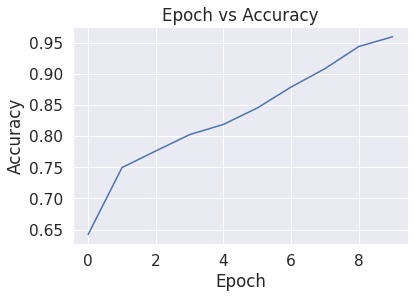

In [99]:
model = Sequential()
model.add(Dense(64, input_dim=encode_XTrain.shape[1], kernel_initializer='normal', activation='softsign'))
model.add(Dense(256, kernel_initializer='normal', activation='softsign'))
model.add(Dense(512, kernel_initializer='normal', activation='softsign'))
model.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid'))
optimizer = 'adamax'
# Compile model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history=model.fit(encode_XTrain, categorical_YTrain, epochs=10, batch_size=16)
# plot metrics
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.show()


In [100]:
scores = model.evaluate(encode_Xvalidation, categorical_YValidation)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '



accuracy: 72.24%


In [101]:
snn_pred = model.predict(encode_Xvalidation, batch_size=64, verbose=1)  
snn_predicted = np.argmax(snn_pred, axis=1)
snn_pred_lab = np.argmax(snn_pred, axis=1)
snn_real_lab = np.argmax(categorical_YValidation, axis=1)
print(snn_pred_lab.shape)
print(snn_real_lab.shape)
acc = np.sum(snn_pred_lab==snn_real_lab)/snn_real_lab.shape[0]
print(acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


(753,)
(753,)
0.7250996015936255


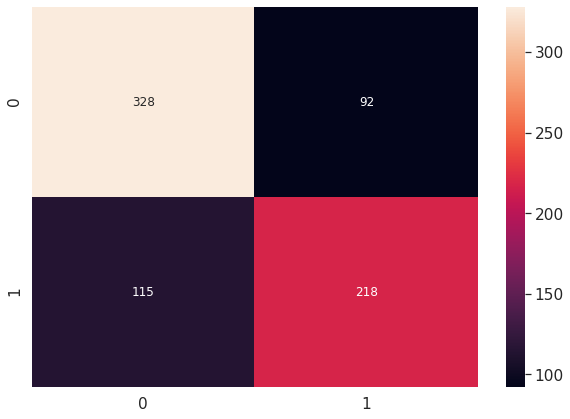

In [102]:
#Creamos la matriz de confusión
snn_cm = confusion_matrix(np.argmax(categorical_YValidation, axis=1), snn_predicted)

# Visualizamos la matriz de confusión
snn_df_cm = pd.DataFrame(snn_cm, range(2), range(2))  
plt.figure(figsize = (10,7))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(snn_df_cm, annot=True, fmt = 'd',annot_kws={"size": 12}) # font size  
plt.show() 

In [103]:
snn_report = classification_report(np.argmax(categorical_YValidation, axis=1), snn_predicted)  
print(snn_report)

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       420
           1       0.70      0.65      0.68       333

    accuracy                           0.73       753
   macro avg       0.72      0.72      0.72       753
weighted avg       0.72      0.73      0.72       753



##CNN - Convolutional Neural Networks

In [110]:
#Baseline Model with CNN

# normalize inputs from 0-255 to 0-1
X_train_normalize = rx_train / 255
X_test_normalize = rx_test / 255

In [116]:
input_shape = (64, 64,3)
X_train_normalize.shape

(6768, 64, 64, 3)

In [112]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_YTrain =y_train
encoded_YValidation = y_test
encode_XTrain=X_train_normalize
encode_Xvalidation=X_test_normalize

# convert integers to dummy variables (i.e. one hot encoded)
categorical_YTrain = np_utils.to_categorical(encoded_YTrain)
categorical_YValidation = np_utils.to_categorical(encoded_YValidation)

In [113]:
encode_XTrain.shape, categorical_YTrain.shape

((6768, 64, 64, 3), (6768, 2))

In [114]:
X_train.shape, y_train.shape

((6768, 64, 64, 3), (6768,))

In [119]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()

    
    model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.2)) # esta comentada
    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_classes, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  
    return model

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# How to Tune Batch Size and Number of Epochs

model = KerasClassifier(build_fn=create_model, verbose=1)

# summarize layers
print(create_model().summary())



Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 128)       

In [ ]:
t0 = time()

# define the grid search parameters
batch_size = [16,32]
epochs = [10,50]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=2, verbose=1)
grid_result = grid.fit(X_train, categorical_YTrain)

print("done in %0.3fs" % (time() - t0))


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

###Tuning Model CNN

In [ ]:
# create model
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2)) #comentado
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(num_classes, activation='sigmoid'))
optimizer = SGD()
# Compile model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# summarize layers
print(model.summary())

Epoch 1/20
113/113 [==============================] - 2s 11ms/step - loss: nan - accuracy: 0.5483
Epoch 2/20
113/113 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.5674
Epoch 3/20
113/113 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.5631
Epoch 4/20
113/113 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.5560
Epoch 5/20
113/113 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.5556
Epoch 6/20
113/113 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.5618
Epoch 7/20
113/113 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.5661
Epoch 8/20
113/113 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.5739
Epoch 9/20
113/113 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.5538
Epoch 10/20
113/113 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.5572
Epoch 11/20
113/113

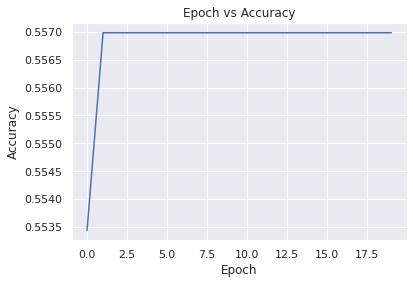

In [ ]:
#Ejecutar el modelo de red neuronal
history=model.fit(encode_XTrain, categorical_YTrain, epochs=50, batch_size=32)


# plot metrics
plt.figure(figsize=(15, 6))
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.savefig(fname=BASE_DIR_GRA +"/CNN Epoch vs Accuracy "+fecha_hora()+".png") 
plt.show()
    
    



In [ ]:
scores = model.evaluate(encode_Xvalidation, categorical_YValidation)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
snn_pred = model.predict(encode_Xvalidation, batch_size=20, verbose=1)  
snn_predicted = np.argmax(snn_pred, axis=1)
snn_pred_lab = np.argmax(snn_pred, axis=1)
snn_real_lab = np.argmax(categorical_YValidation, axis=1)
print(snn_pred_lab.shape)
print(snn_real_lab.shape)
acc = np.sum(snn_pred_lab==snn_real_lab)/snn_real_lab.shape[0]
print(acc)

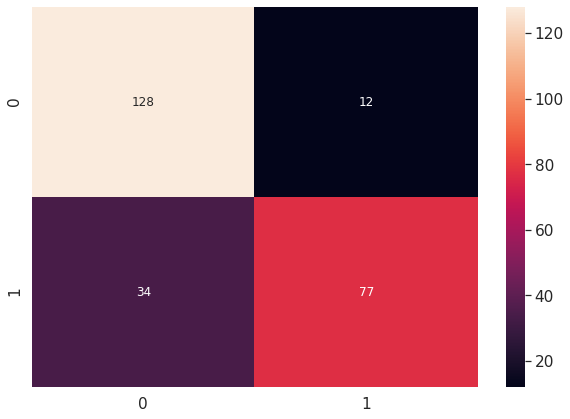

In [ ]:
#Creamos la matriz de confusión
snn_cm = confusion_matrix(np.argmax(categorical_YValidation, axis=1), snn_predicted)

# Visualizamos la matriz de confusión
snn_df_cm = pd.DataFrame(snn_cm, range(num_classes), range(num_classes))  
plt.figure(figsize = (10,7))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(snn_df_cm, annot=True, fmt = 'd',annot_kws={"size": 12}) # font size  
plt.show() 

In [ ]:
snn_report = classification_report(np.argmax(categorical_YValidation, axis=1), snn_predicted)  
print(snn_report)

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       140
           1       0.87      0.69      0.77       111

    accuracy                           0.82       251
   macro avg       0.83      0.80      0.81       251
weighted avg       0.82      0.82      0.81       251

